<a href="https://colab.research.google.com/github/prudnikovatu/gist/blob/main/vkr_project_target_company____1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Аналитическая задача** -- по признаковому описанию построить портрет клиента, склонного к положительному отклику на рекламное предложение.

Предполагается, что получив такую оценку для некоторого множества клиентов, компания будет обращаться только к тем из них, которые склонны к отклику.

**Описание полей**

|Признак|Расшифровка|
|--:|:--|
| AGREEMENT_RK | уникальный идентификатор объекта в выборке |
| TARGET | целевая переменная:отклик на маркетинговую кампанию (1 - отклик был зарегистрирован, 0 - отклика не было) |
| AGE |	возраст клиента |
| SOCSTATUS_WORK_FL | социальный статус клиента относительно работы (1 - работает, 0 - не работает)|
| SOCSTATUS_PENS_FL | социальный статус клиента относительно пенсии (1 - пенсионер, 0 - не пенсионер)|
| GENDER | пол клиента |
| CHILD_TOTAL | количество детей клиента |
| DEPENDANTS | количество иждивенцев клиента
| EDUCATION | образование |
| MARITAL_STATUS | семейное положение |
| GEN_INDUSTRY | отрасль работы клиента |
| GEN_TITLE |	должность |
| ORG_TP_STATE |	форма собственности компании|
| ORG_TP_FCAPITAL |	отношение к иностранному капиталу|
| JOB_DIR |	направление деятельности внутри компании|
| FAMILY_INCOME |	семейный доход (несколько категорий)|
| PERSONAL_INCOME |	личный доход клиента (в рублях)|
| REG_ADDRESS_PROVINCE | область регистрации клиента|
| FACT_ADDRESS_PROVINCE | область фактического пребывания клиента |
| POSTAL_ADDRESS_PROVINCE |	почтовый адрес область|
| TP_PROVINCE |	область торговой точки, где клиент брал последний кредит|
| REGION_NM	| регион РФ |
| FL_PRESENCE_FL | наличие в собственности квартиры (1 - есть, 0 - нет)|
| OWN_AUTO | кол-во автомобилей в собственности|
| AUTO_RUS_FL | наличие в собственности автомобиля российского производства ( 1 - есть, 0 - нет)|
| HS_PRESENCE_FL |	наличие в собственности загородного дома (1 - есть, 0 - нет)|
| COT_PRESENCE_FL |	наличие в собственности котеджа (1 - есть, 0 - нет) |
| GAR_PRESENCE_FL |	наличие в собственности гаража (1 - есть, 0 - нет)|
| LAND_PRESENCE_FL | наличие в собственности земельного участка (1 - есть, 0 - нет)|
| FACT_LIVING_TERM | количество месяцев проживания по месту фактического пребывания |
| WORK_TIME | время работы на текущем месте (в месяцах) |
| CREDIT | сумма последнего кредита клиента (в рублях) |
| TERM | срок кредита, мес.|
| LOAN_NUM_PAYM | количество платежей, которые сделал клиент |
| LOAN_DLQ_NUM | количество просрочек, допущенных клиентом |
| LOAN_MAX_DLQ_AMT | максимальная сумма просрочки (в рублях) |
| DATE_CREDIT | дата взятия кредита |

**Примерный план по выполнению проекта**

Шаг 1. Загрузка данных;

Шаг 2. Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения.

Шаг 3. Добавьте в таблицу следующие признаки:
- день недели, месяц и год взятия кредита;
- адрес регистрации и адрес фактического пребывания клиента совпадают (1 -- совпадает, 0 -- не совпадает);
- адрес фактического пребывания клиента и его почтовый адрес совпадают(1 -- совпадает, 0 -- не совпадает);
- адрес регистрации клиента и его почтовый адрес совпадают(1 -- совпадает, 0 -- не совпадает);
- почтовый, фактический и адрес регистрации совпадают (1 -- совпадают, 0 -- не совпадают);
- область регистрации, фактического пребывания, почтового адреса и область расположения торговой точки, где клиент брал кредит совпадают (1 -- совпадают, 0 -- не совпадают);

Шаг 4. Провести исследовательский анализ данных:
- исследовать динамику количества кредитов по годам, месяцам;
- исследовать числовые и категориальные признаки в разрезе целевого признака;
- сделать выводы о влиянии признаков на целевой признак.

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ks_2samp
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu


In [ ]:
def calc_boxplot(df_col : pd.Series) -> tuple:

    """
    Функция для расчета значений нижнего и верхнего усов.
    На вход подается столбец датафрейма,
    на выходе кортеж: первый элемент -- нижний ус, второй элемент -- верхний ус
    """

    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

In [ ]:
def missing_summary_table(df):
  miss_df = pd.concat([df.isna().sum().to_frame(name = '1'),
                 np.round(df.isna().mean().to_frame(name = '2')*100,
                          decimals = 2)],
                axis = 1).reset_index()
  miss_df.columns = ['Признак',
               'Количество пропусков',
               'Процент пропусков']
  miss_df.sort_values(by = 'Количество пропусков',
                      ascending = False, inplace = True)
  miss_df['Процент пропусков'] = (miss_df['Процент пропусков'].
                                  map('{:,.2f}%'.format))
  return miss_df.style.set_caption('Сводная таблица по пропускам')

Шаг 1. Загрузка данных

In [ ]:
df = pd.read_csv('dataset_target_company.csv')
df

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FACT_LIVING_TERM,WORK_TIME,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ_AMT,DATE_CREDIT
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,0,8000.00,6,220,18.0,6,2,1580.0,2017-10-01 15:09:09
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,0,21650.00,6,137,97.0,6,1,4020.0,2020-10-09 18:58:35
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,0,33126.00,12,251,84.0,11,0,0.0,2015-05-05 11:10:07
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,0,0,8491.82,6,36,168.0,6,3,1590.0,2016-06-19 10:05:49
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,0,21990.00,12,83,101.0,16,2,2230.0,2016-03-13 14:22:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15218,75291424,0,25,1,0,0,1,1,Среднее,Состою в браке,...,0,0,13450.00,10,121,48.0,21,0,0.0,2018-04-11 17:38:21
15219,75291888,0,51,1,0,1,2,0,Среднее специальное,Состою в браке,...,0,0,8991.00,6,300,156.0,3,0,0.0,2021-12-21 18:09:58
15220,75291923,0,22,1,0,1,1,1,Среднее,Не состоял в браке,...,0,0,2700.00,6,48,48.0,5,0,0.0,2016-11-26 10:13:32
15221,75291960,0,60,0,1,1,2,0,Среднее,Вдовец/Вдова,...,0,0,24357.00,10,270,NaN,3,0,0.0,2017-04-07 11:27:54


Шаг 2. Первичная обработка данных

In [ ]:
#изучаем название столбцов, для выявления необходимости их корректировки
df.columns

Index(['AGREEMENT_RK', 'TARGET', 'AGE', 'SOCSTATUS_WORK_FL',
       'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'EDUCATION',
       'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE',
       'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME',
       'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
       'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'FL_PRESENCE_FL',
       'OWN_AUTO', 'AUTO_RUS_FL', 'HS_PRESENCE_FL', 'COT_PRESENCE_FL',
       'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL', 'CREDIT', 'TERM',
       'FACT_LIVING_TERM', 'WORK_TIME', 'LOAN_NUM_PAYM', 'LOAN_DLQ_NUM',
       'LOAN_MAX_DLQ_AMT', 'DATE_CREDIT'],
      dtype='object')

In [ ]:
#приводим столбцы к нижнему регистру
df.columns = [col.lower() for col in df.columns]
#переименуем некоторые столбы, для удобства работы с ними
df.rename(columns={'agreement_rk': 'id', 'socstatus_work_fl':'socstatus_work', \
                   'socstatus_pens_fl':'socstatus_pens', 'child_total':'child', \
                   'reg_address_province':'reg_address', 'fact_address_province':'fact_address',\
                   'postal_address_province':'postal_address', 'fl_presence_fl': 'flat',\
                    'auto_rus_fl':'auto_rus', 'hs_presence_fl':'house', 'cot_presence_fl':'cottage',\
                   'gar_presence_fl':'garage', 'land_presence_fl': 'land plot',\
                   'loan_num_paym':'payment','loan_dlq_num':'delay_count', \
                   'loan_max_dlq_amt': 'maxsum_delay'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                15223 non-null  int64  
 1   target            15223 non-null  int64  
 2   age               15223 non-null  int64  
 3   socstatus_work    15223 non-null  int64  
 4   socstatus_pens    15223 non-null  int64  
 5   gender            15223 non-null  int64  
 6   child             15223 non-null  int64  
 7   dependants        15223 non-null  int64  
 8   education         15223 non-null  object 
 9   marital_status    15223 non-null  object 
 10  gen_industry      13856 non-null  object 
 11  gen_title         13856 non-null  object 
 12  org_tp_state      13856 non-null  object 
 13  org_tp_fcapital   13858 non-null  object 
 14  job_dir           13856 non-null  object 
 15  family_income     15223 non-null  object 
 16  personal_income   15223 non-null  float6

In [ ]:
#знакомимся с данными с типом 'object'
df[['gen_industry', 'gen_title', 'org_tp_state', 'org_tp_fcapital', 'job_dir',
    'family_income', 'reg_address', 'fact_address', 'postal_address',
    'tp_province', 'region_nm']].head(2)

,gen_industry,gen_title,org_tp_state,org_tp_fcapital,job_dir,family_income,reg_address,fact_address,postal_address,tp_province,region_nm
0,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ
1,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ


In [ ]:
df.family_income.unique()

array(['от 10000 до 20000 руб.', 'от 20000 до 50000 руб.',
       'свыше 50000 руб.', 'от 5000 до 10000 руб.', 'до 5000 руб.'],
      dtype=object)

In [ ]:
#изменяем тип данных для признака 'date_credit'
df = df.astype({'date_credit':'datetime64[ns]'})

In [ ]:
#проверяем дублирующие записи
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(columns = ['id']).duplicated().sum()

np.int64(0)

In [ ]:
#проверяем наличие аномальных значений

In [ ]:
#поделю признаки на категориальные и непрерывные
cols_dist = ['target', 'socstatus_work', 'socstatus_pens', 'gender','education',
             'marital_status', 'gen_industry','gen_title', 'org_tp_state',
             'org_tp_fcapital', 'job_dir', 'family_income', 'reg_address', 'fact_address',
             'postal_address', 'tp_province', 'region_nm', 'flat', 'auto_rus',
             'house', 'cottage', 'garage', 'land plot', 'date_credit']

cols_cont = ['age', 'child', 'dependants', 'personal_income', 'own_auto', 'credit',
             'term', 'fact_living_term', 'work_time', 'payment', 'delay_count',
             'maxsum_delay']

In [ ]:
per = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
df[cols_cont].describe(percentiles=per, include = "all")

,age,child,dependants,personal_income,own_auto,credit,term,fact_living_term,work_time,payment,delay_count,maxsum_delay
count,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,1.522300e+04,1.385500e+04,15223.000000,15223.000000,15223.000000
mean,40.406096,1.099389,0.645208,13853.836323,0.116337,14667.959345,8.101031,3.039340e+03,2.922120e+02,7.875977,0.195362,243.021626
std,11.601068,0.995411,0.812252,9015.467617,0.320844,12147.873496,4.094090,2.624554e+05,2.436483e+04,7.955747,0.685022,836.100116
min,21.000000,0.000000,0.000000,24.000000,0.000000,2000.000000,3.000000,-2.600000e+01,1.000000e+00,1.000000,0.000000,0.000000
1%,22.000000,0.000000,0.000000,4300.000000,0.000000,2498.220000,3.000000,1.000000e+00,3.000000e+00,1.000000,0.000000,0.000000
5%,24.000000,0.000000,0.000000,5000.000000,0.000000,3500.000000,3.000000,7.000000e+00,6.000000e+00,2.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,8000.000000,0.000000,6500.000000,6.000000,4.100000e+01,2.400000e+01,4.000000,0.000000,0.000000
50%,39.000000,1.000000,0.000000,12000.000000,0.000000,11550.000000,6.000000,1.080000e+02,4.800000e+01,5.000000,0.000000,0.000000
75%,50.000000,2.000000,1.000000,17000.000000,0.000000,19170.000000,10.000000,2.040000e+02,1.100000e+02,8.000000,0.000000,0.000000
95%,60.000000,3.000000,2.000000,30000.000000,1.000000,33800.000000,12.000000,3.410000e+02,2.880000e+02,24.000000,1.000000,1900.000000


In [ ]:
round(df[cols_cont].median(),2)

,0
age,39.0
child,1.0
dependants,0.0
personal_income,12000.0
own_auto,0.0
credit,11550.0
term,6.0
fact_living_term,108.0
work_time,48.0
payment,5.0


In [ ]:
round(df[cols_cont].mode(),2)

,age,child,dependants,personal_income,own_auto,credit,term,fact_living_term,work_time,payment,delay_count,maxsum_delay
0,27,1,0,10000.0,0,3000.0,6,36,36.0,4,0,0.0


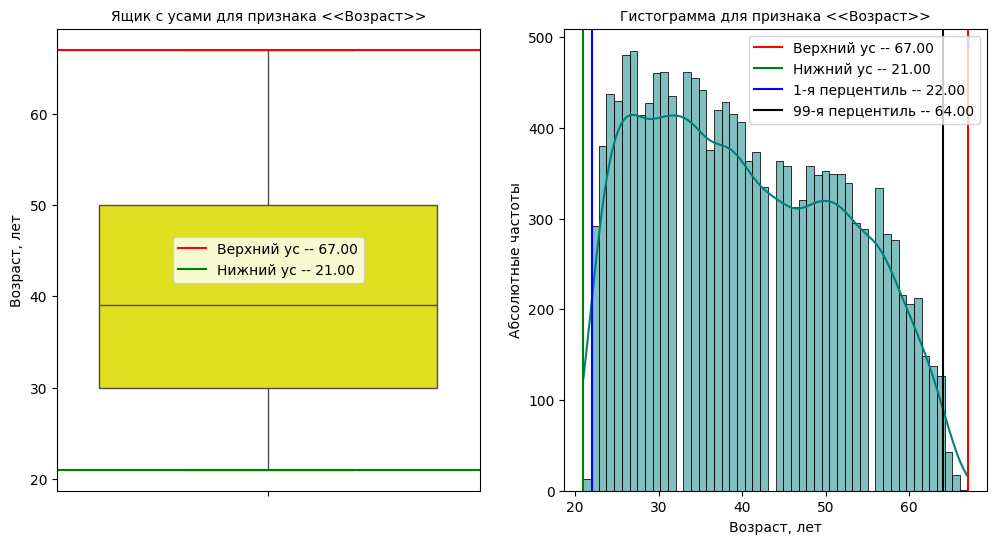

In [ ]:
#анализируем признак 'age'
plt.subplots(nrows=1,
             ncols=2,
             figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df,
            y='age',
            color='yellow')
actual_loval, actual_hival = calc_boxplot(df['age'])
plt.axhline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axhline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
plt.title('Ящик с усами для признака <<Возраст>>', fontsize=10)
plt.ylabel('Возраст, лет', fontsize=10)
plt.legend()
plt.subplot(1,2,2)
sns.histplot(data=df,
             x='age',
             color='teal',
             bins=50,
             kde=True)
plt.title('Гистограмма для признака <<Возраст>>', fontsize=10)
plt.xlabel('Возраст, лет', fontsize=10)
plt.ylabel('Абсолютные частоты', fontsize=10)
plt.axvline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axvline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
per_1 = np.nanpercentile(df['age'], 1)
per_99 = np.nanpercentile(df['age'], 99)
plt.axvline(per_1,
            color='blue',
            label=f'1-я перцентиль -- {per_1:.2f}')
plt.axvline(per_99,
            color='black',
            label=f'99-я перцентиль -- {per_99:.2f}')
plt.legend()


In [ ]:
#отсечем значения ниже 22 лет и старше 64 лет (исходя из показателя 'percentiles')
no_anomals_age = df.age.between(22,64)
(1 - df[no_anomals_age].shape[0]/df.shape[0])*100

0.4861065493004024

In [ ]:
#анализируем показатель 'child'
df.loc[no_anomals_age].child.value_counts()

,count
child,
1,5075
0,4938
2,4127
3,797
4,132
5,59
6,12
7,5
10,3


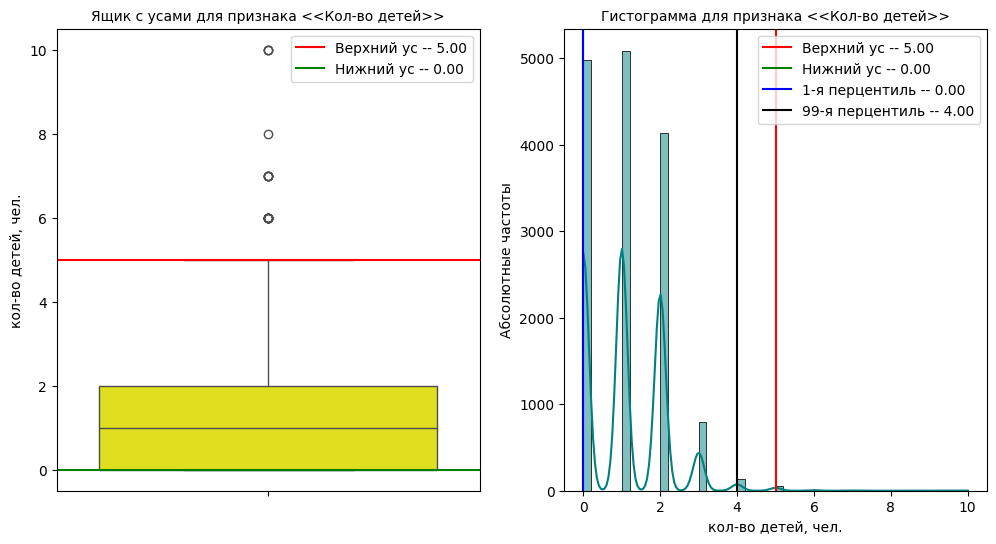

In [ ]:
plt.subplots(nrows=1,
             ncols=2,
             figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df,
            y='child',
            color='yellow')
actual_loval, actual_hival = calc_boxplot(df['child'])
plt.axhline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axhline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
plt.title('Ящик с усами для признака <<Кол-во детей>>', fontsize=10)
plt.ylabel('кол-во детей, чел.', fontsize=10)
plt.legend()
plt.subplot(1,2,2)
sns.histplot(data=df,
             x='child',
             color='teal',
             bins=50,
             kde=True)
plt.title('Гистограмма для признака <<Кол-во детей>>', fontsize=10)
plt.xlabel('кол-во детей, чел.', fontsize=10)
plt.ylabel('Абсолютные частоты', fontsize=10)
plt.axvline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axvline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
per_1 = np.nanpercentile(df['child'], 1)
per_99 = np.nanpercentile(df['child'], 99)
plt.axvline(per_1,
            color='blue',
            label=f'1-я перцентиль -- {per_1:.2f}')
plt.axvline(per_99,
            color='black',
            label=f'99-я перцентиль -- {per_99:.2f}')
plt.legend()

In [ ]:
no_anomals_child = df[no_anomals_age].child.between(0,4)
(1 - df[no_anomals_age & no_anomals_child].shape[0]/df.shape[0])*100

1.0116271431386714

In [ ]:
#анализируем показатель 'dependants'
df.loc[no_anomals_age & no_anomals_child].dependants.value_counts()

,count
dependants,
0,8109
1,4518
2,2161
3,240
4,39
5,2


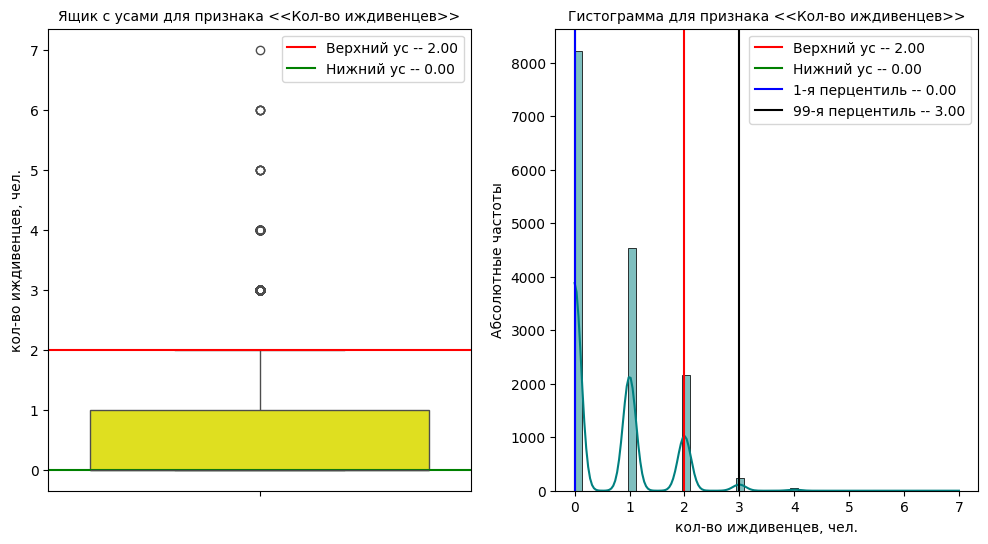

In [ ]:
plt.subplots(nrows=1,
             ncols=2,
             figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df,
            y='dependants',
            color='yellow')
actual_loval, actual_hival = calc_boxplot(df['dependants'])
plt.axhline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axhline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
plt.title('Ящик с усами для признака <<Кол-во иждивенцев>>', fontsize=10)
plt.ylabel('кол-во иждивенцев, чел.', fontsize=10)
plt.legend()
plt.subplot(1,2,2)
sns.histplot(data=df,
             x='dependants',
             color='teal',
             bins=50,
             kde=True)
plt.title('Гистограмма для признака <<Кол-во иждивенцев>>', fontsize=10)
plt.xlabel('кол-во иждивенцев, чел.', fontsize=10)
plt.ylabel('Абсолютные частоты', fontsize=10)
plt.axvline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axvline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
per_1 = np.nanpercentile(df['dependants'], 1)
per_99 = np.nanpercentile(df['dependants'], 99)
plt.axvline(per_1,
            color='blue',
            label=f'1-я перцентиль -- {per_1:.2f}')
plt.axvline(per_99,
            color='black',
            label=f'99-я перцентиль -- {per_99:.2f}')
plt.legend()

In [ ]:
#отсекаем нижнюю границу по 99 per, тк при отсечении по верхней границе уса наблюдается большой процент потери данных
no_anomals_dependants = df[no_anomals_age & no_anomals_child].dependants.between(0,3)
(1 - df[no_anomals_age & no_anomals_child & no_anomals_dependants].shape[0]/df.shape[0])*100

1.2809564474807855

In [ ]:
#анализируем показатель 'personal_income'

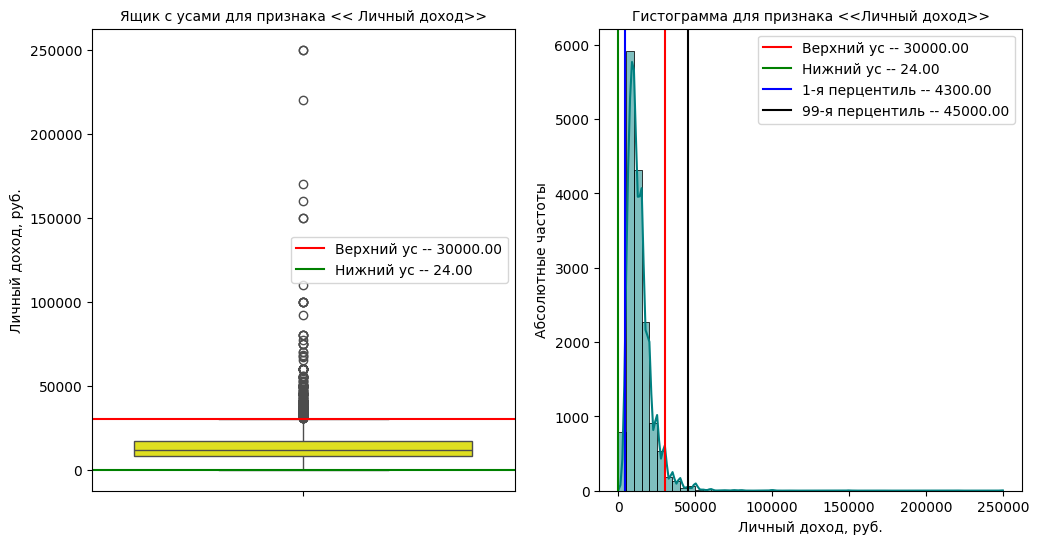

In [ ]:
plt.subplots(nrows=1,
             ncols=2,
             figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df,
            y='personal_income',
            color='yellow')
actual_loval, actual_hival = calc_boxplot(df['personal_income'])
plt.axhline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axhline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
plt.title('Ящик с усами для признака << Личный доход>>', fontsize=10)
plt.ylabel('Личный доход, руб.', fontsize=10)
plt.legend()
plt.subplot(1,2,2)
sns.histplot(data=df,
             x='personal_income',
             color='teal',
             bins=50,
             kde=True)
plt.title('Гистограмма для признака <<Личный доход>>', fontsize=10)
plt.xlabel('Личный доход, руб.', fontsize=10)
plt.ylabel('Абсолютные частоты', fontsize=10)
plt.axvline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axvline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
per_1 = np.nanpercentile(df['personal_income'], 1)
per_99 = np.nanpercentile(df['personal_income'], 99)
plt.axvline(per_1,
            color='blue',
            label=f'1-я перцентиль -- {per_1:.2f}')
plt.axvline(per_99,
            color='black',
            label=f'99-я перцентиль -- {per_99:.2f}')
plt.legend()


In [ ]:
no_anomals_personal_income = df[no_anomals_age & no_anomals_child & no_anomals_dependants].\
                              personal_income.between(4300.0, 40000.0)
(1 - df[no_anomals_age & no_anomals_child & no_anomals_dependants & no_anomals_personal_income].shape[0]/df.shape[0])*100

3.2450896669513285

In [ ]:
#анализируем показатель 'own_auto'
df.loc[no_anomals_age & no_anomals_child & no_anomals_dependants &
       no_anomals_personal_income].own_auto.value_counts()

,count
own_auto,
0,13038
1,1690
2,1


In [ ]:
no_anomals_own_auto = df[no_anomals_age & no_anomals_child & no_anomals_dependants &
       no_anomals_personal_income].own_auto.between(0,1)
(1 - df[no_anomals_age & no_anomals_child & no_anomals_dependants &
       no_anomals_personal_income & no_anomals_own_auto].shape[0]/df.shape[0])*100

3.2516586743743026

In [ ]:
#анализируем признак 'credit'

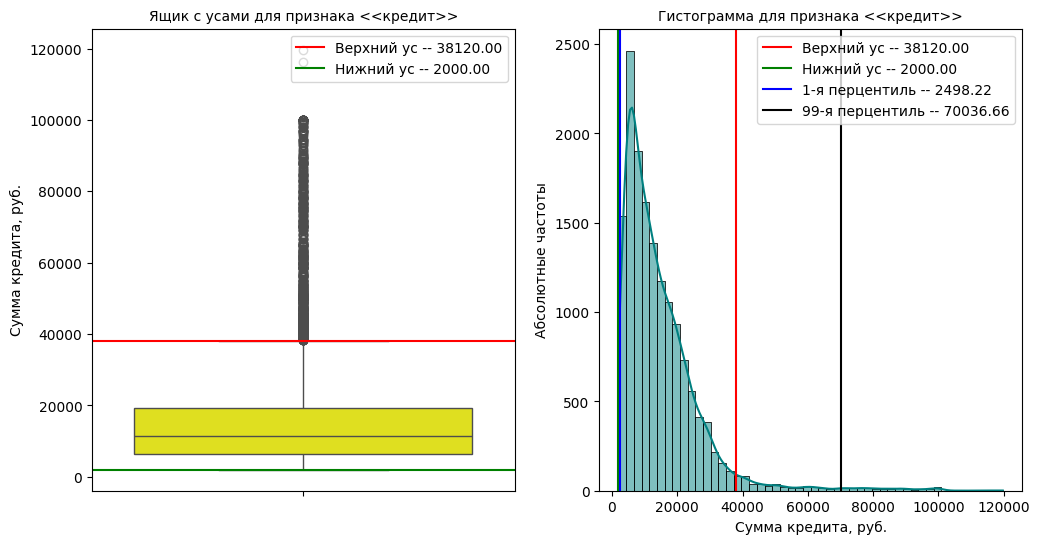

In [ ]:
plt.subplots(nrows=1,
             ncols=2,
             figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df,
            y='credit',
            color='yellow')
actual_loval, actual_hival = calc_boxplot(df['credit'])
plt.axhline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axhline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
plt.title('Ящик с усами для признака <<кредит>>', fontsize=10)
plt.ylabel('Сумма кредита, руб.', fontsize=10)
plt.legend()
plt.subplot(1,2,2)
sns.histplot(data=df,
             x='credit',
             color='teal',
             bins=50,
             kde=True)
plt.title('Гистограмма для признака <<кредит>>', fontsize=10)
plt.xlabel('Сумма кредита, руб.', fontsize=10)
plt.ylabel('Абсолютные частоты', fontsize=10)
plt.axvline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axvline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
per_1 = np.nanpercentile(df['credit'], 1)
per_99 = np.nanpercentile(df['credit'], 99)
plt.axvline(per_1,
            color='blue',
            label=f'1-я перцентиль -- {per_1:.2f}')
plt.axvline(per_99,
            color='black',
            label=f'99-я перцентиль -- {per_99:.2f}')
plt.legend()


In [ ]:
no_anomals_credit = df[no_anomals_age & no_anomals_child & no_anomals_dependants & no_anomals_personal_income]\
             .credit.between(2498.22, 38120.0)
(1 - df[no_anomals_age & no_anomals_child & no_anomals_dependants & no_anomals_personal_income
        & no_anomals_credit].shape[0]/df.shape[0])*100

7.436116402811532

In [ ]:
#анализируем признак 'term'
df.loc[no_anomals_age & no_anomals_child & no_anomals_dependants
                & no_anomals_personal_income & no_anomals_credit].term.value_counts()

,count
term,
6,4814
12,2698
10,2317
3,1763
5,578
9,523
4,424
8,376
18,206


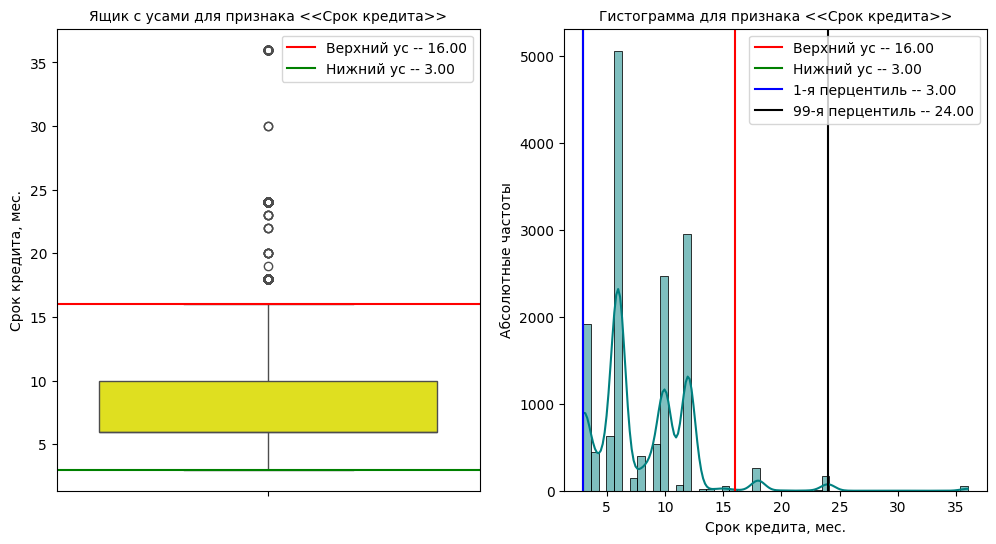

In [ ]:
plt.subplots(nrows=1,
             ncols=2,
             figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df,
            y='term',
            color='yellow')
actual_loval, actual_hival = calc_boxplot(df['term'])
plt.axhline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axhline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
plt.title('Ящик с усами для признака <<Срок кредита>>', fontsize=10)
plt.ylabel('Срок кредита, мес.', fontsize=10)
plt.legend()
plt.subplot(1,2,2)
sns.histplot(data=df,
             x='term',
             color='teal',
             bins=50,
             kde=True)
plt.title('Гистограмма для признака <<Срок кредита>>', fontsize=10)
plt.xlabel('Срок кредита, мес.', fontsize=10)
plt.ylabel('Абсолютные частоты', fontsize=10)
plt.axvline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axvline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
per_1 = np.nanpercentile(df['term'], 1)
per_99 = np.nanpercentile(df['term'], 99)
plt.axvline(per_1,
            color='blue',
            label=f'1-я перцентиль -- {per_1:.2f}')
plt.axvline(per_99,
            color='black',
            label=f'99-я перцентиль -- {per_99:.2f}')
plt.legend()

In [ ]:
no_anomals_term = df[no_anomals_age & no_anomals_child & no_anomals_dependants &
                     no_anomals_personal_income & no_anomals_credit]\
                    .term.between(3, 18)
(1 - df[no_anomals_age & no_anomals_child & no_anomals_dependants & no_anomals_personal_income
        & no_anomals_credit & no_anomals_term ].shape[0]/df.shape[0])*100

8.230966300991916

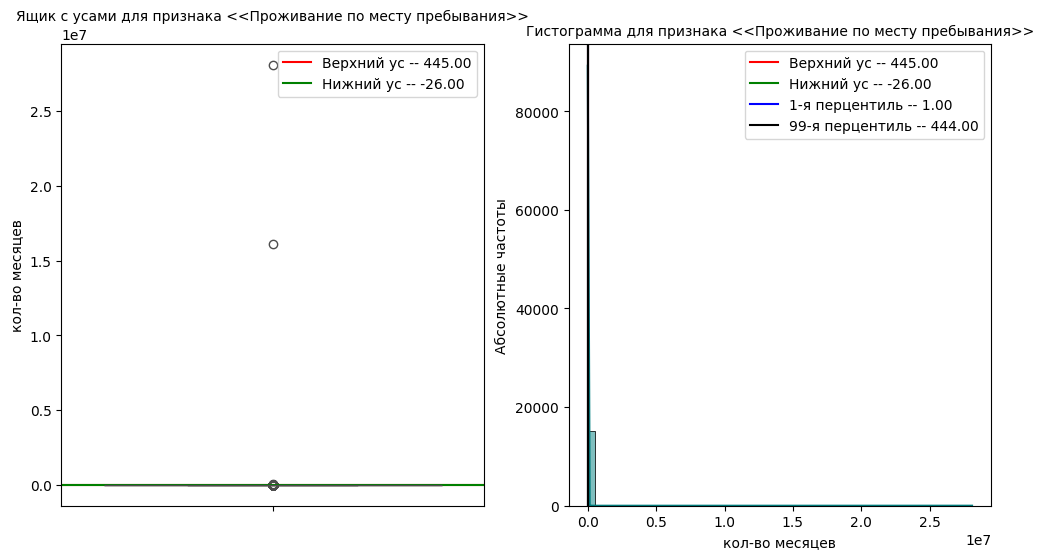

In [ ]:
#анализируем признак 'fact_living_term'
plt.subplots(nrows=1,
             ncols=2,
             figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df,
            y='fact_living_term',
            color='yellow')
actual_loval, actual_hival = calc_boxplot(df['fact_living_term'])
plt.axhline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axhline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
plt.title('Ящик с усами для признака <<Проживание по месту пребывания>>', fontsize=10)
plt.ylabel('кол-во месяцев', fontsize=10)
plt.legend()
plt.subplot(1,2,2)
sns.histplot(data=df,
             x='fact_living_term',
             color='teal',
             bins=50,
             kde=True)
plt.title('Гистограмма для признака <<Проживание по месту пребывания>>', fontsize=10)
plt.xlabel('кол-во месяцев', fontsize=10)
plt.ylabel('Абсолютные частоты', fontsize=10)
plt.axvline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axvline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
per_1 = np.nanpercentile(df['fact_living_term'], 1)
per_99 = np.nanpercentile(df['fact_living_term'], 99)
plt.axvline(per_1,
            color='blue',
            label=f'1-я перцентиль -- {per_1:.2f}')
plt.axvline(per_99,
            color='black',
            label=f'99-я перцентиль -- {per_99:.2f}')
plt.legend()

Признак "fact_living_term"отражает временные характеристики, с большим разбросом.
Учитывая это выявление в них аномалий затруднительно.
Чистка по значениям 'усов' приводит к высокому проценту потери данных, т.к. велик разброс около единичных значений.
Т.о. данную характеристику предлагаю не очищать.

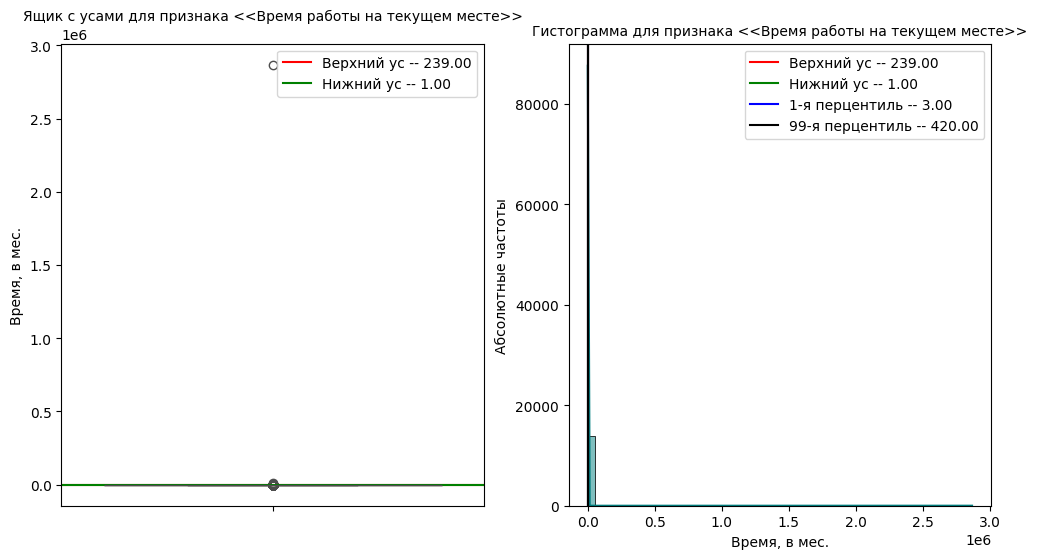

In [ ]:
#анализируем признак 'work_time'
plt.subplots(nrows=1,
             ncols=2,
             figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df,
            y='work_time',
            color='yellow')
actual_loval, actual_hival = calc_boxplot(df['work_time'])
plt.axhline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axhline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
plt.title('Ящик с усами для признака <<Время работы на текущем месте>>', fontsize=10)
plt.ylabel('Время, в мес.', fontsize=10)
plt.legend()
plt.subplot(1,2,2)
sns.histplot(data=df,
             x='work_time',
             color='teal',
             bins=50,
             kde=True)
plt.title('Гистограмма для признака <<Время работы на текущем месте>>', fontsize=10)
plt.xlabel('Время, в мес.', fontsize=10)
plt.ylabel('Абсолютные частоты', fontsize=10)
plt.axvline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axvline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
per_1 = np.nanpercentile(df['work_time'], 1)
per_99 = np.nanpercentile(df['work_time'], 99)
plt.axvline(per_1,
            color='blue',
            label=f'1-я перцентиль -- {per_1:.2f}')
plt.axvline(per_99,
            color='black',
            label=f'99-я перцентиль -- {per_99:.2f}')
plt.legend()

Признак 'work_time' отражает временные характеристики, с большим разбросом.
Учитывая это выявление в них аномалий затруднительно.
Чистка по значениям 'усов' приводит к высокому проценту потери данных, т.к. велик разброс около единичных значений.
Т.о. данную характеристику предлагаю не очищать.


In [ ]:
#анализируем признак 'payment'
df.loc[no_anomals_age & no_anomals_child & no_anomals_dependants & no_anomals_personal_income
        & no_anomals_credit & no_anomals_term ].payment.value_counts()

,count
payment,
4,3632
5,2098
6,1860
3,1522
1,379
...,...
54,1
63,1
79,1


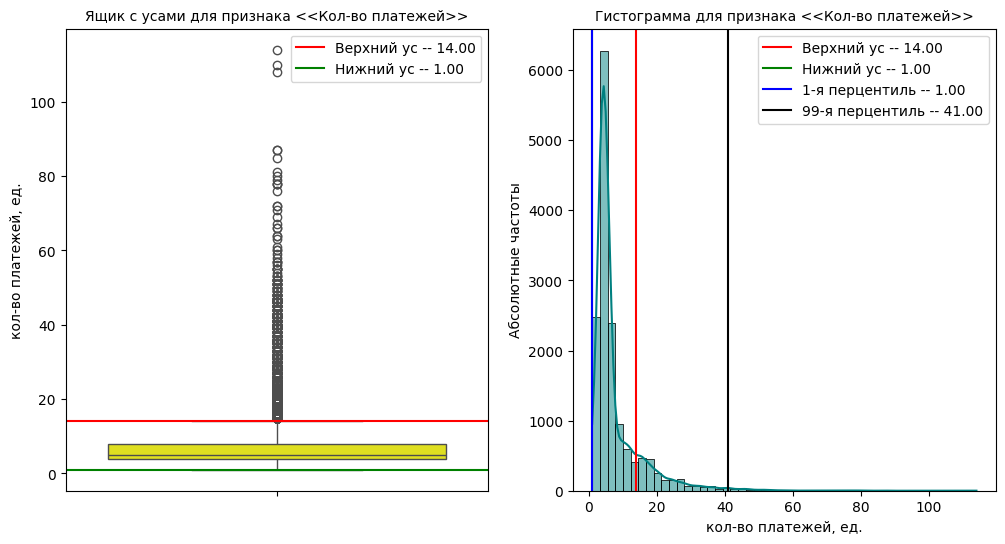

In [ ]:
plt.subplots(nrows=1,
             ncols=2,
             figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df,
            y='payment',
            color='yellow')
actual_loval, actual_hival = calc_boxplot(df['payment'])
plt.axhline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axhline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
plt.title('Ящик с усами для признака <<Кол-во платежей>>', fontsize=10)
plt.ylabel('кол-во платежей, ед.', fontsize=10)
plt.legend()
plt.subplot(1,2,2)
sns.histplot(data=df,
             x='payment',
             color='teal',
             bins=50,
             kde=True)
plt.title('Гистограмма для признака <<Кол-во платежей>>', fontsize=10)
plt.xlabel('кол-во платежей, ед.', fontsize=10)
plt.ylabel('Абсолютные частоты', fontsize=10)
plt.axvline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axvline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
per_1 = np.nanpercentile(df['payment'], 1)
per_99 = np.nanpercentile(df['payment'], 99)
plt.axvline(per_1,
            color='blue',
            label=f'1-я перцентиль -- {per_1:.2f}')
plt.axvline(per_99,
            color='black',
            label=f'99-я перцентиль -- {per_99:.2f}')
plt.legend()

In [ ]:
#чистку проведем исходя показателя статистик - 'percentiles'.
#ТК при использований значений усов, отмечается большой процент потери данных.
no_anomals_payment= df[no_anomals_age & no_anomals_child & no_anomals_dependants
                  & no_anomals_personal_income & no_anomals_credit & no_anomals_term ]\
                  .payment.between(2, 41)
(1 - df[no_anomals_age & no_anomals_child & no_anomals_dependants & no_anomals_personal_income
        & no_anomals_credit & no_anomals_term & no_anomals_payment].shape[0]/df.shape[0])*100

11.561453064441963

In [ ]:
#анализируем признак 'delay_count'
df.loc[no_anomals_age & no_anomals_child & no_anomals_dependants & no_anomals_personal_income
        & no_anomals_credit & no_anomals_term & no_anomals_payment].delay_count.value_counts()

,count
delay_count,
0,11748
1,1279
2,242
3,84
4,45
5,32
6,14
7,12
9,3


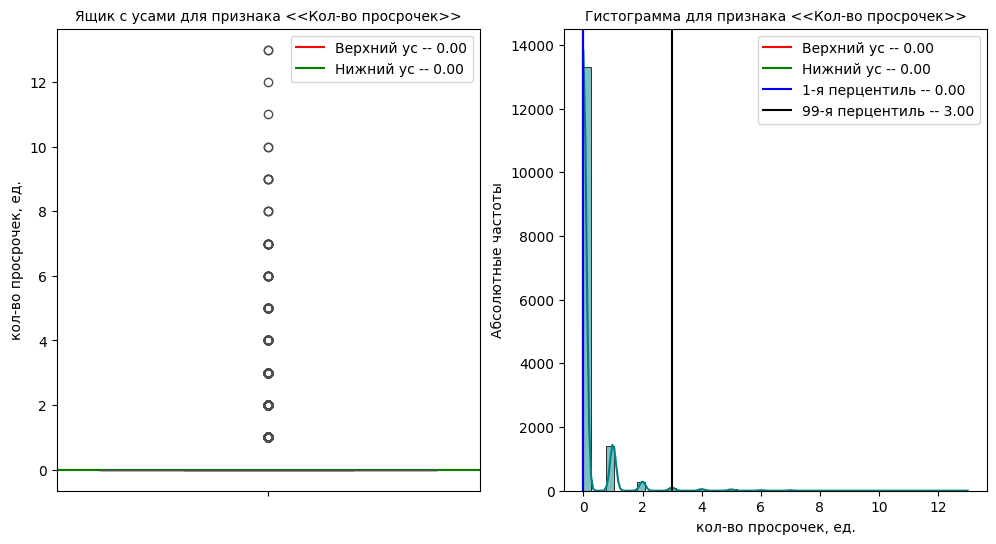

In [ ]:
plt.subplots(nrows=1,
             ncols=2,
             figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df,
            y='delay_count',
            color='yellow')
actual_loval, actual_hival = calc_boxplot(df['delay_count'])
plt.axhline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axhline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
plt.title('Ящик с усами для признака <<Кол-во просрочек>>', fontsize=10)
plt.ylabel('кол-во просрочек, ед.', fontsize=10)
plt.legend()
plt.subplot(1,2,2)
sns.histplot(data=df,
             x='delay_count',
             color='teal',
             bins=50,
             kde=True)
plt.title('Гистограмма для признака <<Кол-во просрочек>>', fontsize=10)
plt.xlabel('кол-во просрочек, ед.', fontsize=10)
plt.ylabel('Абсолютные частоты', fontsize=10)
plt.axvline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axvline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
per_1 = np.nanpercentile(df['delay_count'], 1)
per_99 = np.nanpercentile(df['delay_count'], 99)
plt.axvline(per_1,
            color='blue',
            label=f'1-я перцентиль -- {per_1:.2f}')
plt.axvline(per_99,
            color='black',
            label=f'99-я перцентиль -- {per_99:.2f}')
plt.legend()

In [ ]:
no_anomals_delay_count= df[no_anomals_age & no_anomals_child & no_anomals_dependants
                        & no_anomals_personal_income & no_anomals_credit & no_anomals_term
                        & no_anomals_payment].delay_count.between(0, 3)
(1 - df[no_anomals_age & no_anomals_child & no_anomals_dependants & no_anomals_personal_income
        & no_anomals_credit & no_anomals_term & no_anomals_payment & no_anomals_delay_count]
        .shape[0]/df.shape[0])*100

12.284043880969586

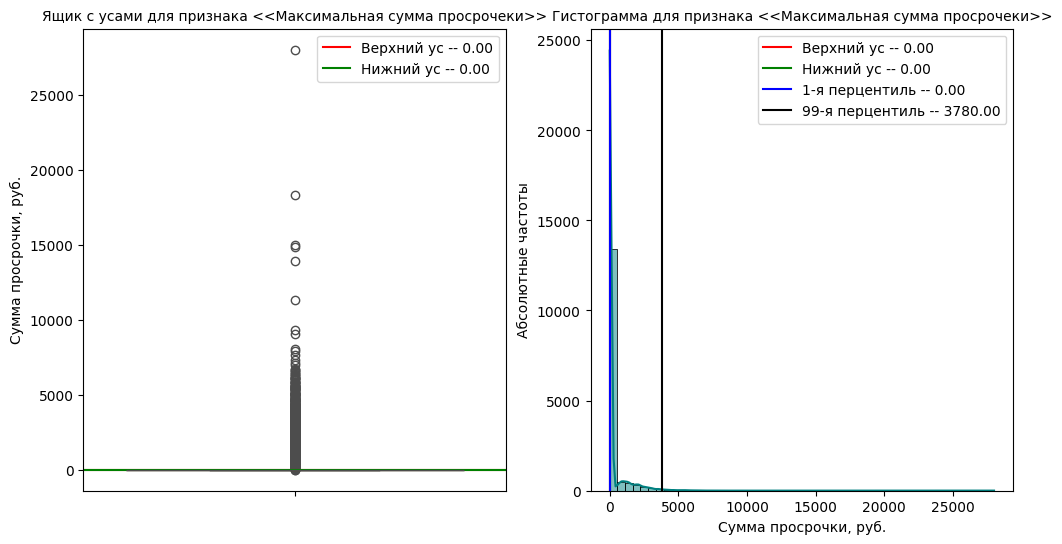

In [ ]:
#анализируем показатель 'maxsum_delay'
plt.subplots(nrows=1,
             ncols=2,
             figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df,
            y='maxsum_delay',
            color='yellow')
actual_loval, actual_hival = calc_boxplot(df['maxsum_delay'])
plt.axhline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axhline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
plt.title('Ящик с усами для признака <<Максимальная сумма просрочеки>>', fontsize=10)
plt.ylabel('Сумма просрочки, руб.', fontsize=10)
plt.legend()
plt.subplot(1,2,2)
sns.histplot(data=df,
             x='maxsum_delay',
             color='teal',
             bins=50,
             kde=True)
plt.title('Гистограмма для признака <<Максимальная сумма просрочеки>>', fontsize=10)
plt.xlabel('Сумма просрочки, руб.', fontsize=10)
plt.ylabel('Абсолютные частоты', fontsize=10)
plt.axvline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axvline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
per_1 = np.nanpercentile(df['maxsum_delay'], 1)
per_99 = np.nanpercentile(df['maxsum_delay'], 99)
plt.axvline(per_1,
            color='blue',
            label=f'1-я перцентиль -- {per_1:.2f}')
plt.axvline(per_99,
            color='black',
            label=f'99-я перцентиль -- {per_99:.2f}')
plt.legend()

Изучив статистики по данному показателю, сделаем предположение, что: максимальная сумма просрочки характерна для клиентов старше 60 лет.
Т.о. чистку от аномалий проводить по данному признаку не будем, т.к. это приведет к существенной потери данных.

In [ ]:
#фильтруем датасет
df_clean = df.loc[no_anomals_age & no_anomals_child & no_anomals_dependants & no_anomals_personal_income
        & no_anomals_credit & no_anomals_term & no_anomals_payment & no_anomals_delay_count]

In [ ]:
#проанализируем категориальные признаки
for col in cols_dist:
    print(f"Значения признака {col}")
    print(df_clean[col].value_counts())
    print('#'*44)

Значения признака target
target
0    11802
1     1551
Name: count, dtype: int64
############################################
Значения признака socstatus_work
socstatus_work
1    12199
0     1154
Name: count, dtype: int64
############################################
Значения признака socstatus_pens
socstatus_pens
0    11647
1     1706
Name: count, dtype: int64
############################################
Значения признака gender
gender
1    8714
0    4639
Name: count, dtype: int64
############################################
Значения признака education
education
Среднее специальное               5815
Среднее                           4114
Высшее                            2633
Неоконченное высшее                487
Неполное среднее                   286
Два и более высших образования      18
Name: count, dtype: int64
############################################
Значения признака marital_status
marital_status
Состою в браке        8229
Не состоял в браке    3242
Разведен(а)           108

In [ ]:
no_anomals_education = (df_clean.education != 'Два и более высших образования')
no_anomals_gen_industry  = ((df_clean.loc[no_anomals_education].gen_industry != 'СМИ/Реклама/PR-агенства')
                        & (df_clean.loc[no_anomals_education].gen_industry != 'Юридические услуги/нотариальные услуги')
                        & (df_clean.loc[no_anomals_education].gen_industry != 'Страхование')
                        & (df_clean.loc[no_anomals_education].gen_industry != 'Туризм')
                        & (df_clean.loc[no_anomals_education].gen_industry != 'Недвижимость')
                        & (df_clean.loc[no_anomals_education].gen_industry != 'Управляющая компания')
                        & (df_clean.loc[no_anomals_education].gen_industry != 'Подбор персонала')
                        & (df_clean.loc[no_anomals_education].gen_industry != 'Логистика')
                        & (df_clean.loc[no_anomals_education].gen_industry != 'Маркетинг'))
no_anomals_gen_title = ((df_clean.loc[no_anomals_education & no_anomals_gen_industry].gen_title != 'Военнослужащий по контракту')
                        & (df_clean.loc[no_anomals_education & no_anomals_gen_industry].gen_title != 'Партнер'))
no_anomals_org_tp_state = (df_clean.loc[no_anomals_education & no_anomals_gen_industry & no_anomals_gen_title]
                           .org_tp_state != 'Частная ком. с инос. капиталом')
no_anomals_job_dir = ((df_clean.loc[no_anomals_education & no_anomals_gen_industry & no_anomals_gen_title
                     & no_anomals_org_tp_state].job_dir != 'Пр-техн. обесп. и телеком.') & (df_clean.loc[no_anomals_education
                     & no_anomals_gen_industry & no_anomals_gen_title & no_anomals_org_tp_state]
                     .job_dir != 'Юридическая служба') & (df_clean.loc[no_anomals_education & no_anomals_gen_industry
                     & no_anomals_gen_title & no_anomals_org_tp_state].job_dir != 'Реклама и маркетинг'))
no_anomals_family_income  = ((df_clean.loc[no_anomals_education & no_anomals_gen_industry
                     & no_anomals_gen_title & no_anomals_org_tp_state& no_anomals_job_dir]
                     .family_income != 'до 5000 руб.') & (df_clean.loc[no_anomals_education & no_anomals_gen_industry
                     & no_anomals_gen_title & no_anomals_org_tp_state & no_anomals_job_dir]
                     .family_income != 'свыше 50000 руб.'))
no_anomals_reg_address  = ((df_clean.loc[no_anomals_education & no_anomals_gen_industry
                     & no_anomals_gen_title & no_anomals_org_tp_state& no_anomals_job_dir & no_anomals_family_income]
                     .reg_address != 'Агинский Бурятский АО') & (df_clean.loc[no_anomals_education & no_anomals_gen_industry
                     & no_anomals_gen_title & no_anomals_org_tp_state& no_anomals_job_dir & no_anomals_family_income]
                     .reg_address != 'Усть-Ордынский Бурятский АО') & (df_clean.loc[no_anomals_education & no_anomals_gen_industry
                     & no_anomals_gen_title & no_anomals_org_tp_state& no_anomals_job_dir & no_anomals_family_income]
                     .reg_address != 'Дагестан') & (df_clean.loc[no_anomals_education & no_anomals_gen_industry
                     & no_anomals_gen_title & no_anomals_org_tp_state& no_anomals_job_dir & no_anomals_family_income]
                     .reg_address != 'Эвенкийский АО'))
no_anomals_fact_address  = ((df_clean.loc[no_anomals_education & no_anomals_gen_industry & no_anomals_gen_title
                          & no_anomals_org_tp_state & no_anomals_job_dir & no_anomals_family_income & no_anomals_reg_address]
                     .fact_address != 'Агинский Бурятский АО') & (df_clean.loc[no_anomals_education & no_anomals_gen_industry
                     & no_anomals_gen_title & no_anomals_org_tp_state & no_anomals_job_dir & no_anomals_family_income
                     & no_anomals_reg_address].fact_address != 'Усть-Ордынский Бурятский АО') & (df_clean.loc[no_anomals_education
                     & no_anomals_gen_industry & no_anomals_gen_title & no_anomals_org_tp_state& no_anomals_job_dir
                     & no_anomals_family_income  & no_anomals_reg_address].fact_address != 'Дагестан') & (df_clean.loc[no_anomals_education
                     & no_anomals_gen_industry & no_anomals_gen_title & no_anomals_org_tp_state& no_anomals_job_dir & no_anomals_family_income
                     & no_anomals_reg_address].fact_address != 'Эвенкийский АО'))
no_anomals_postal_address  = ((df_clean.loc[no_anomals_education & no_anomals_gen_industry & no_anomals_gen_title
                              & no_anomals_org_tp_state & no_anomals_job_dir & no_anomals_family_income
                              & no_anomals_reg_address&no_anomals_fact_address].postal_address != 'Агинский Бурятский АО')
                              & (df_clean.loc[no_anomals_education & no_anomals_gen_industry & no_anomals_gen_title
                              & no_anomals_org_tp_state & no_anomals_job_dir & no_anomals_family_income
                              & no_anomals_reg_address&no_anomals_fact_address].postal_address != 'Усть-Ордынский Бурятский АО')
                              & (df_clean.loc[no_anomals_education & no_anomals_gen_industry & no_anomals_gen_title
                              & no_anomals_org_tp_state & no_anomals_job_dir & no_anomals_family_income & no_anomals_reg_address
                              & no_anomals_fact_address].postal_address != 'Эвенкийский АО'))
no_anomals_tp_province  = ((df_clean.loc[no_anomals_education & no_anomals_gen_industry & no_anomals_gen_title & no_anomals_org_tp_state
       & no_anomals_job_dir & no_anomals_family_income & no_anomals_reg_address&no_anomals_fact_address
       & no_anomals_postal_address].tp_province != 'Магаданская область')
       & (df_clean.loc[no_anomals_education & no_anomals_gen_industry & no_anomals_gen_title & no_anomals_org_tp_state
       & no_anomals_job_dir & no_anomals_family_income & no_anomals_reg_address&no_anomals_fact_address
       & no_anomals_postal_address].tp_province != 'Москва')
       & (df_clean.loc[no_anomals_education & no_anomals_gen_industry & no_anomals_gen_title & no_anomals_org_tp_state
       & no_anomals_job_dir & no_anomals_family_income & no_anomals_reg_address&no_anomals_fact_address
       & no_anomals_postal_address].tp_province != 'Кабардино-Балкария'))

In [ ]:
# посчитаем процент потерь данных при фильтрации категориальных признаков, в чатси очистки от малых значений
(1 - df_clean[no_anomals_education & no_anomals_gen_industry & no_anomals_gen_title & no_anomals_org_tp_state
        & no_anomals_job_dir & no_anomals_family_income & no_anomals_reg_address & no_anomals_fact_address
        & no_anomals_postal_address & no_anomals_tp_province ].shape[0]/df_clean.shape[0])*100

5.2198007938291

In [ ]:
# повторно фильтруем датасет с учетом категориальных признаков
df_clean = df_clean.loc[no_anomals_education & no_anomals_gen_industry & no_anomals_gen_title & no_anomals_org_tp_state
        & no_anomals_job_dir & no_anomals_family_income & no_anomals_reg_address & no_anomals_fact_address
        & no_anomals_postal_address & no_anomals_tp_province ]

In [ ]:
#проанализируем наличие пропущенных значений
print(df.isna().sum().sum())

8497


In [ ]:
miss_table = missing_summary_table(df)
miss_table

,Признак,Количество пропусков,Процент пропусков
32,work_time,1368,8.99%
12,org_tp_state,1367,8.98%
10,gen_industry,1367,8.98%
11,gen_title,1367,8.98%
14,job_dir,1367,8.98%
13,org_tp_fcapital,1365,8.97%
20,tp_province,295,1.94%
21,region_nm,1,0.01%
4,socstatus_pens,0,0.00%
0,id,0,0.00%


Пропуски есть, но пока они нам не мешают - их не удаляем и не заполняем.

Шаг 3. Добавляем дополнительные признаки, согласно заданию к ВКР

In [ ]:
#день недели, месяц и год взятия кредита;
df_clean['dweek_num_credit'] = df_clean['date_credit'].dt.weekday #номер дня недели от 0 до 6
df_clean['dweek_name_credit'] = df_clean['date_credit'].dt.day_name() #значение дня недели строкой
df_clean['month_credit'] = df_clean['date_credit'].dt.to_period('M') #месяц в привязке к году
df_clean['onlymonth_credit'] = pd.DatetimeIndex(df_clean['date_credit']).month #выделим только номер месяца
df_clean['year_credit'] = df_clean['date_credit'].dt.to_period('Y')

#проверка
df_clean[['date_credit', 'month_credit','onlymonth_credit','year_credit', 'dweek_num_credit', 'dweek_name_credit']].head(2)

,date_credit,month_credit,onlymonth_credit,year_credit,dweek_num_credit,dweek_name_credit
0,2017-10-01 15:09:09,2017-10,10,2017,6,Sunday
1,2020-10-09 18:58:35,2020-10,10,2020,4,Friday


In [ ]:
#адрес регистрации и адрес фактического пребывания клиента совпадают (1 -- совпадает, 0 -- не совпадает);
df_clean['reg_fact'] = np.where(df_clean.reg_address == df_clean.fact_address, '1', '0').astype(int)
#адрес фактического пребывания клиента и его почтовый адрес совпадают(1 -- совпадает, 0 -- не совпадает);
df_clean['fact_postal'] = np.where(df_clean.fact_address == df_clean.postal_address, '1', '0').astype(int)
#адрес регистрации клиента и его почтовый адрес совпадают(1 -- совпадает, 0 -- не совпадает);
df_clean['reg_postal'] = np.where(df_clean.reg_address == df_clean.postal_address, '1', '0').astype(int)
#почтовый, фактический и адрес регистрации совпадают (1 -- совпадают, 0 -- не совпадают);
df_clean['total_address'] = np.where(df_clean.fact_postal == df_clean.reg_postal, '1', '0').astype(int)
#область регистрации, фактического пребывания, почтового адреса и область расположения торговой точки, где клиент брал кредит совпадают (1 -- совпадают, 0 -- не совпадают);
df_clean['address_province'] = np.where(df_clean.total_address ==
                            (np.where(df_clean.fact_address == df_clean.tp_province, '1', '0')
                            .astype(int)), '1', '0').astype(int)

#проверка
df_clean[['reg_address', 'fact_address', 'postal_address', 'tp_province','reg_fact','fact_postal', 'reg_postal', 'total_address', 'address_province']].head(5)

,reg_address,fact_address,postal_address,tp_province,reg_fact,fact_postal,reg_postal,total_address,address_province
0,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,1,1,1,1,1
1,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,1,1,1,1,0
2,Иркутская область,Иркутская область,Иркутская область,Иркутская область,1,1,1,1,1
3,Ростовская область,Ростовская область,Ростовская область,Ростовская область,1,1,1,1,1
4,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,1,1,1,1,0


In [ ]:
# поправим и добавим описание полей
df_clean.columns

Index(['id', 'target', 'age', 'socstatus_work', 'socstatus_pens', 'gender',
       'child', 'dependants', 'education', 'marital_status', 'gen_industry',
       'gen_title', 'org_tp_state', 'org_tp_fcapital', 'job_dir',
       'family_income', 'personal_income', 'reg_address', 'fact_address',
       'postal_address', 'tp_province', 'region_nm', 'flat', 'own_auto',
       'auto_rus', 'house', 'cottage', 'garage', 'land plot', 'credit', 'term',
       'fact_living_term', 'work_time', 'payment', 'delay_count',
       'maxsum_delay', 'date_credit', 'dweek_num_credit', 'dweek_name_credit',
       'month_credit', 'onlymonth_credit', 'year_credit', 'reg_fact',
       'fact_postal', 'reg_postal', 'total_address', 'address_province'],
      dtype='object')

**Описание полей**

|Признак|Расшифровка|
|--:|:--|
| id | уникальный идентификатор объекта в выборке |
| target | целевая переменная:отклик на маркетинговую кампанию (1 - отклик был зарегистрирован, 0 - отклика не было) |
| age |	возраст клиента |
| socstatus_work | социальный статус клиента относительно работы (1 - работает, 0 - не работает)|
| socstatus_pens | социальный статус клиента относительно пенсии (1 - пенсионер, 0 - не пенсионер)|
| gender | пол клиента |
| child | количество детей клиента |
| dependants | количество иждивенцев клиента
| education  | образование |
| marital_status | семейное положение |
| gen_industry | отрасль работы клиента |
| gen_title |	должность |
| org_tp_state |	форма собственности компании|
| org_tp_fcapital |	отношение к иностранному капиталу|
| job_dir |	направление деятельности внутри компании|
| family_income |	семейный доход (несколько категорий)|
| personal_income |	личный доход клиента (в рублях)|
| reg_address | область регистрации клиента|
| fact_address | область фактического пребывания клиента |
| postal_address |	почтовый адрес область|
| tp_province |	область торговой точки, где клиент брал последний кредит|
| region_nm | регион РФ |
| flat | наличие в собственности квартиры (1 - есть, 0 - нет)|
| own_auto | кол-во автомобилей в собственности|
| auto_rus | наличие в собственности автомобиля российского производства ( 1 - есть, 0 - нет)|
| house |	наличие в собственности загородного дома (1 - есть, 0 - нет)|
| cottage |	наличие в собственности котеджа (1 - есть, 0 - нет) |
| garage|	наличие в собственности гаража (1 - есть, 0 - нет)|
| land plot | наличие в собственности земельного участка (1 - есть, 0 - нет)|
| fact_living_term | количество месяцев проживания по месту фактического пребывания |
| work_time | время работы на текущем месте (в месяцах) |
| credit | сумма последнего кредита клиента (в рублях) |
| term | срок кредита, мес.|
| payment | количество платежей, которые сделал клиент |
| delay_count | количество просрочек, допущенных клиентом |
| maxsum_delay | максимальная сумма просрочки (в рублях) |
| date_credit | дата взятия кредита |
| reg_fact | адрес регистрации и адрес фактического пребывания клиента совпадают (1 -- совпадает, 0 -- не совпадает)|
| fact_postal | адрес фактического пребывания клиента и его почтовый адрес совпадают(1 -- совпадает, 0 -- не совпадает)|
| reg_postal | адрес регистрации клиента и его почтовый адрес совпадают(1 -- совпадает, 0 -- не совпадает)|
| total_address | почтовый, фактический и адрес регистрации совпадают (1 -- совпадают, 0 -- не совпадают)|
| addres_province | область регистрации, фактического пребывания, почтового адреса и область расположения торговой точки, где клиент брал кредит совпадают (1 -- совпадают, 0 -- не совпадают)|
| dweek_num_credit | день недели получения кредита (0 -- понедельник, 1 -- вторник, 2-- среда, 3-- четверг, 4 -- пятница, 5 -- суббота, 6 -- воскресенье)|
| dweek_name_credit | день недели получения кредита (строковое значение)|
| month_credit | месяц получения кредита в привязке к году|
| onlymonth_credit| месяц получения кредита|
| year_credit | год получения кредита|


Шаг 4. Исследовательский анализ данных (EDA)


1.исследовать динамику количества кредитов по годам, месяцам;

In [ ]:
table_credit = pd.pivot_table(df_clean,
               index='year_credit',
               columns= 'onlymonth_credit',
               values= 'date_credit',
               aggfunc= 'count',
               margins=True).reset_index().rename(columns = {'year_credit':'year'})
table_credit

onlymonth_credit,year,1,2,3,4,5,6,7,8,9,10,11,12,All
0,2015,156,133,147,151,142,152,133,141,158,139,156,128,1736
1,2016,157,147,135,161,166,161,144,149,152,160,146,134,1812
2,2017,179,160,159,131,152,175,155,151,161,168,157,163,1911
3,2018,140,144,143,153,140,151,142,143,131,172,147,154,1760
4,2019,160,136,149,139,151,158,145,145,133,127,162,147,1752
5,2020,151,143,176,181,134,155,156,154,138,136,153,153,1830
6,2021,136,151,148,145,181,159,141,147,169,157,155,166,1855
7,All,1079,1014,1057,1061,1066,1111,1016,1030,1042,1059,1076,1045,12656


<ipython-input-57-4790a07961c7>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(table_credit['year'].drop(7));


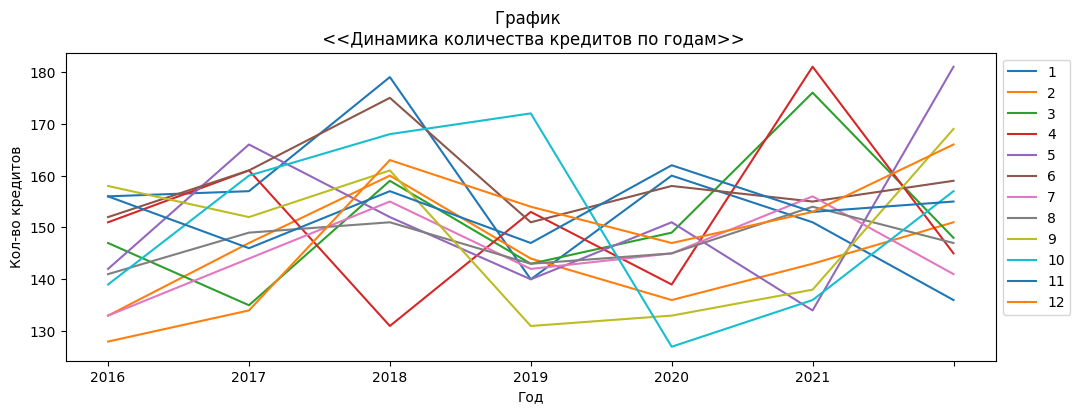

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4));
table_credit.loc[:, (table_credit.columns !='All')].drop(7).plot(ax=axs);
plt.title("График \n <<Динамика количества кредитов по годам>>")
axs.set_ylabel("Кол-во кредитов");
axs.set_xlabel('Год');
axs.set_xticklabels(table_credit['year'].drop(7));
plt.legend(bbox_to_anchor=(1,1), loc="upper left");


ПРЕДПОЛОЖЕНИЯ:

Самые успешный год по росту количества кредитов относительно других годов: 2017 год (пики роста большинства месяцев)

Самый провальный год по объему выдачи кредитов относительно других годов: 2018 год (пики падения большинства месяцев)

In [ ]:
# формирую выборки для проведения проверки гипотез
year_15 = df_clean.groupby(('month_credit'))['date_credit'].count().loc['2015-01':'2015-12']\
                             .reset_index().rename(columns ={'date_credit':'count_credit_15'})
year_16 = df_clean.groupby(('month_credit'))['date_credit'].count().loc['2016-01':'2016-12']\
                             .reset_index().rename(columns ={'date_credit':'count_credit_16'})
year_17 = df_clean.groupby(('month_credit'))['date_credit'].count().loc['2017-01':'2017-12']\
                             .reset_index().rename(columns ={'date_credit':'count_credit_17'})
year_18 = df_clean.groupby(('month_credit'))['date_credit'].count().loc['2018-01':'2018-12']\
                           .reset_index().rename(columns ={'date_credit':'count_credit_18'})
year_19 = df_clean.groupby(('month_credit'))['date_credit'].count().loc['2019-01':'2019-12']\
                           .reset_index().rename(columns ={'date_credit':'count_credit_19'})
year_20 = df_clean.groupby(('month_credit'))['date_credit'].count().loc['2020-01':'2020-12']\
                           .reset_index().rename(columns ={'date_credit':'count_credit_20'})
year_21 = df_clean.groupby(('month_credit'))['date_credit'].count().loc['2021-01':'2021-12']\
                           .reset_index().rename(columns ={'date_credit':'count_credit_21'})

year_15['num_month'] = [1,2,3,4,5,6,7,8,9,10,11,12]
num_month = year_15['num_month']
year_15 = year_15.drop('num_month', axis=1)
year_15 = year_15.drop('month_credit', axis=1)
year_15.insert(0, 'num_month', num_month)

year_16['num_month'] = [1,2,3,4,5,6,7,8,9,10,11,12]
num_month = year_16['num_month']
year_16 = year_16.drop('num_month', axis=1)
year_16 = year_16.drop('month_credit', axis=1)
year_16.insert(0, 'num_month', num_month)

year_17['num_month'] = [1,2,3,4,5,6,7,8,9,10,11,12]
num_month = year_17['num_month']
year_17 = year_17.drop('num_month', axis=1)
year_17 = year_17.drop('month_credit', axis=1)
year_17.insert(0, 'num_month', num_month)

year_18['num_month'] = [1,2,3,4,5,6,7,8,9,10,11,12]
num_month = year_18['num_month']
year_18 = year_18.drop('num_month', axis=1)
year_18 = year_18.drop('month_credit', axis=1)
year_18.insert(0, 'num_month', num_month)

year_19['num_month'] = [1,2,3,4,5,6,7,8,9,10,11,12]
num_month = year_19['num_month']
year_19 = year_19.drop('num_month', axis=1)
year_19 = year_19.drop('month_credit', axis=1)
year_19.insert(0, 'num_month', num_month)

year_20['num_month'] = [1,2,3,4,5,6,7,8,9,10,11,12]
num_month = year_20['num_month']
year_20 = year_20.drop('num_month', axis=1)
year_20 = year_20.drop('month_credit', axis=1)
year_20.insert(0, 'num_month', num_month)

year_21['num_month'] = [1,2,3,4,5,6,7,8,9,10,11,12]
num_month = year_21['num_month']
year_21 = year_21.drop('num_month', axis=1)
year_21 = year_21.drop('month_credit', axis=1)
year_21.insert(0, 'num_month', num_month)

credit_simile = pd.merge(year_15, year_16, on="num_month")
credit_simile = pd.merge(credit_simile, year_17, on="num_month")
credit_simile = pd.merge(credit_simile, year_18, on="num_month")
credit_simile = pd.merge(credit_simile, year_19, on="num_month")
credit_simile = pd.merge(credit_simile, year_20, on="num_month")
credit_simile = pd.merge(credit_simile, year_21, on="num_month")

In [ ]:
#адаптированная функция для проверки подчинения выборок нормальному закону распредления
def ver_hyp(col, alpha):
    _, p_value = shapiro(credit_simile[col].dropna())
    if p_value <= alpha:
        print(f"""p_value = {p_value}. Для признака <<{col}>> гипотеза о нормальности распределения ОТВЕРГАЕТСЯ.""")
    else:
        print(f'p_value = {p_value}. Для признака <<{col}>> гипотеза о нормальности распределения ПРИНИМАЕТСЯ')

Проверка гипотез о подчинении нормальному закону распределения:

1.

---гипотеза Н_0: Случайная величина 'Количество кредитов, полученных клиентами в 2015 году' подчиняется нормальному закону распределения;

---гипотеза H_1: Cлучайная величина 'Количество кредитов, полученных клиентами в 2015 году' имеет распределение, отличное от нормального закона;

2.

---гипотеза Н_0: Случайная величина 'Количество кредитов, полученных клиентами в 2016 году' подчиняется нормальному закону распределения;

---гипотеза H_1: Cлучайная величина 'Количество кредитов, полученных клиентами в 2016 году' имеет распределение, отличное от нормального закона;

3.

---гипотеза Н_0: Случайная величина 'Количество кредитов, полученных клиентами в 2017 году' подчиняется нормальному закону распределения;

---гипотеза H_1: Cлучайная величина 'Количество кредитов, полученных клиентами в 2017 году' имеет распределение, отличное от нормального закона;

4.

---гипотеза Н_0: Случайная величина 'Количество кредитов, полученных клиентами в 2018 году' подчиняется нормальному закону распределения;

---гипотеза H_1: Cлучайная величина 'Количество кредитов, полученных клиентами в 2018 году' имеет распределение, отличное от нормального закона;

5.

---гипотеза Н_0: Случайная величина 'Количество кредитов, полученных клиентами в 2019 году' подчиняется нормальному закону распределения;

---гипотеза H_1: Cлучайная величина 'Количество кредитов, полученных клиентами в 2019 году' имеет распределение, отличное от нормального закона;

6.

---гипотеза Н_0: Случайная величина 'Количество кредитов, полученных клиентами в 2020 году' подчиняется нормальному закону распределения;

---гипотеза H_1: Cлучайная величина 'Количество кредитов, полученных клиентами в 2020 году' имеет распределение, отличное от нормального закона;

7.

---гипотеза Н_0: Случайная величина 'Количество кредитов, полученных клиентами в 2021 году' подчиняется нормальному закону распределения;

---гипотеза H_1: Cлучайная величина 'Количество кредитов, полученных клиентами в 2021 году' имеет распределение, отличное от нормального закона;


In [ ]:
for col in credit_simile.loc[:, (credit_simile.columns != 'num_month')]:
    ver_hyp([col], alpha=0.05)
    print('#'*44)

p_value = 0.44125818629021907. Для признака <<['count_credit_15']>> гипотеза о нормальности распределения ПРИНИМАЕТСЯ
############################################
p_value = 0.5419978194283853. Для признака <<['count_credit_16']>> гипотеза о нормальности распределения ПРИНИМАЕТСЯ
############################################
p_value = 0.5049585997063639. Для признака <<['count_credit_17']>> гипотеза о нормальности распределения ПРИНИМАЕТСЯ
############################################
p_value = 0.13054381145659438. Для признака <<['count_credit_18']>> гипотеза о нормальности распределения ПРИНИМАЕТСЯ
############################################
p_value = 0.8882074256542044. Для признака <<['count_credit_19']>> гипотеза о нормальности распределения ПРИНИМАЕТСЯ
############################################
p_value = 0.14286080472526969. Для признака <<['count_credit_20']>> гипотеза о нормальности распределения ПРИНИМАЕТСЯ
############################################
p_value = 0.9019550221336

Проверка гипотез о равенстве признаков:

1.

---гипотеза Н_0: отсутствует статистически значимая разница между количеством кредитов, выданных в 2017 и 2015 году .

---гипотеза H_1: количество кредитов, выданных в 2017 году больше, чем в 2015 году.

2.

---гипотеза Н_0: отсутствует статистически значимая разница между количеством кредитов, выданных в 2017 и 2016 году .

---гипотеза H_1: количество кредитов, выданных в 2017 году больше, чем в 2016 году.

3.

---гипотеза Н_0: отсутствует статистически значимая разница между количеством кредитов, выданных в 2017 и 2018 году .

---гипотеза H_1: количество кредитов, выданных в 2017 году больше, чем в 2018 году.

4.

---гипотеза Н_0: отсутствует статистически значимая разница между количеством кредитов, выданных в 2017 и 2019 году .

---гипотеза H_1: количество кредитов, выданных в 2017 году больше, чем в 2019 году.

5.

---гипотеза Н_0: отсутствует статистически значимая разница между количеством кредитов, выданных в 2017 и 2020 году .

---гипотеза H_1: количество кредитов, выданных в 2017 году больше, чем в 2020 году.

6.

---гипотеза Н_0: отсутствует статистически значимая разница между количеством кредитов, выданных в 2017 и 2021 году .

---гипотеза H_1: количество кредитов, выданных в 2017 году больше, чем в 2021 году.

In [ ]:
for col in credit_simile.loc[:, (credit_simile.columns != 'num_month') & (credit_simile.columns != 'count_credit_17')]:
    if (np.var(credit_simile['count_credit_17']) / np.var(credit_simile[col])) < 4:
        print(f'Для признака count_credit_17 и <<{col}>> дисперсии генеральной совокупности равны.')
    else:
        print(f'Для признака count_credit_17 и <<{col}>> дисперсии генеральной совокупности не равны.')
    print('#'*44)

Для признака count_credit_17 и <<count_credit_15>> дисперсии генеральной совокупности равны.
############################################
Для признака count_credit_17 и <<count_credit_16>> дисперсии генеральной совокупности равны.
############################################
Для признака count_credit_17 и <<count_credit_18>> дисперсии генеральной совокупности равны.
############################################
Для признака count_credit_17 и <<count_credit_19>> дисперсии генеральной совокупности равны.
############################################
Для признака count_credit_17 и <<count_credit_20>> дисперсии генеральной совокупности равны.
############################################
Для признака count_credit_17 и <<count_credit_21>> дисперсии генеральной совокупности равны.
############################################


In [ ]:
for col in credit_simile.loc[:, (credit_simile.columns != 'num_month') & (credit_simile.columns != 'count_credit_17')]:
    _, p_value = ttest_ind(credit_simile['count_credit_17'], credit_simile[col],
                           equal_var=True, alternative = 'greater')
    if p_value > 0.05:
        print(f'p_value = {p_value}.Для признака <<count_credit_17>> принимается гипотеза H_0.')
    else:
        print(f'p_value = {p_value}.Для признака <<count_credit_17>> принимается гипотеза H_1.')
    print('#'*44)

p_value = 0.0022686174026291203.Для признака <<count_credit_17>> принимается гипотеза H_1.
############################################
p_value = 0.04499147090245312.Для признака <<count_credit_17>> принимается гипотеза H_1.
############################################
p_value = 0.0062104288261005626.Для признака <<count_credit_17>> принимается гипотеза H_1.
############################################
p_value = 0.0053894260768755755.Для признака <<count_credit_17>> принимается гипотеза H_1.
############################################
p_value = 0.11589926373796977.Для признака <<count_credit_17>> принимается гипотеза H_0.
############################################
p_value = 0.18633471450009226.Для признака <<count_credit_17>> принимается гипотеза H_0.
############################################


Предположение сделанное на основе графика и таблицы: """Самые успешный год по росту количества кредитов относительно других годов: 2017 год (пики роста большинства месяцев)"""

Данное предположение частично подтверждено, по результатам проверки гипотез, а именно:

1) удалось подтвердить лишь, 2017 год по количеству выданных кредитов лидирует в отношении 2015, 2016, 2018 и 2019 годов.

2) относительно количества кредитов выданных в части сравнения 2017 года и 2020, 2021 годов статистически значимая разница отсутствует.

_______________________________________________________________________________


Проверка гипотез о равенстве признаков:

1.

---гипотеза Н_0: отсутствует статистически значимая разница между количеством кредитов, выданных в 2018 и 2015 году .

---гипотеза H_1: количество кредитов, выданных в 2018 году существенно меньше, чем в 2015 году.

2.

---гипотеза Н_0: отсутствует статистически значимая разница между количеством кредитов, выданных в 2018 и 2016 году .

---гипотеза H_1: количество кредитов, выданных в 2018 году существенно меньше, чем в 2016 году.

3.

---гипотеза Н_0: отсутствует статистически значимая разница между количеством кредитов, выданных в 2018 и 2017 году .

---гипотеза H_1: количество кредитов, выданных в 2018 году существенно меньше, чем в 2017 году.

4.

---гипотеза Н_0: отсутствует статистически значимая разница между количеством кредитов, выданных в 2018 и 2019 году .

---гипотеза H_1: количество кредитов, выданных в 2018 году существенно меньше, чем в 2019 году.

5.

---гипотеза Н_0: отсутствует статистически значимая разница между количеством кредитов, выданных в 2018 и 2020 году .

---гипотеза H_1: количество кредитов, выданных в 2018 году существенно меньше, чем в 2020 году.

6.

---гипотеза Н_0: отсутствует статистически значимая разница между количеством кредитов, выданных в 2018 и 2021 году .

---гипотеза H_1: количество кредитов, выданных в 2018 году существенно меньше, чем в 2021 году.

In [ ]:
for col in credit_simile.loc[:, (credit_simile.columns != 'num_month') & (credit_simile.columns != 'count_credit_18')]:
    if (np.var(credit_simile['count_credit_18']) / np.var(credit_simile[col])) < 4:
        print(f'Для признака count_credit_18 и <<{col}>> дисперсии генеральной совокупности равны.')
    else:
        print(f'Для признака count_credit_18 и <<{col}>> дисперсии генеральной совокупности не равны.')
    print('#'*44)

Для признака count_credit_18 и <<count_credit_15>> дисперсии генеральной совокупности равны.
############################################
Для признака count_credit_18 и <<count_credit_16>> дисперсии генеральной совокупности равны.
############################################
Для признака count_credit_18 и <<count_credit_17>> дисперсии генеральной совокупности равны.
############################################
Для признака count_credit_18 и <<count_credit_19>> дисперсии генеральной совокупности равны.
############################################
Для признака count_credit_18 и <<count_credit_20>> дисперсии генеральной совокупности равны.
############################################
Для признака count_credit_18 и <<count_credit_21>> дисперсии генеральной совокупности равны.
############################################


In [ ]:
for col in credit_simile.loc[:, (credit_simile.columns != 'num_month') & (credit_simile.columns != 'count_credit_18')]:
    _, p_value = ttest_ind(credit_simile['count_credit_18'], credit_simile[col],
                           equal_var=True, alternative = 'less')
    if p_value > 0.05:
        print(f'p_value = {p_value}.Для признака <<count_credit_18>> принимается гипотеза H_0.')
    else:
        print(f'p_value = {p_value}.Для признака <<count_credit_18>> принимается гипотеза H_1.')
    print('#'*44)

p_value = 0.6823971706862366.Для признака <<count_credit_18>> принимается гипотеза H_0.
############################################
p_value = 0.15660835700521664.Для признака <<count_credit_18>> принимается гипотеза H_0.
############################################
p_value = 0.0062104288261005626.Для признака <<count_credit_18>> принимается гипотеза H_1.
############################################
p_value = 0.5607009757370036.Для признака <<count_credit_18>> принимается гипотеза H_0.
############################################
p_value = 0.1329861378642079.Для признака <<count_credit_18>> принимается гипотеза H_0.
############################################
p_value = 0.05384572262588431.Для признака <<count_credit_18>> принимается гипотеза H_0.
############################################


Предположение сделанное на основе графика и таблицы: """Самый провальный год по объему выдачи кредитов относительно других годов: 2018 год (пики падения большинства месяцев)"""

Данное предположение не подтверждено, по результатам проверки гипотез, а именно:

1) удалось подтвердить лишь, 2018 год по количеству выданных кредитов можно считать провальным только в отношении 2017 года.

2) относительно количества кредитов выданных в части сравнения 2018 года и 2015,2016, 2019, 2020, 2021 годов статистически значимая разница отсутствует.

________________________________________________________________________________

2.исследовать числовые и категориальные признаки в разрезе целевого признака;

In [ ]:
# в связи с большим количеством признаков, содержащихся в датасете, провести их визуализацию не представляется возможным (нехватает ОЗУ для построения графиков по всем прихзнакам).
#Т.о. принято решение построить матрицу корреляции, для отбора наиболее значимых признаков в отношении целевого признака.
#Дальнейший анализ будем проводить в отношении признаков, отобранных по результатам матрицы.

In [ ]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12656 entries, 0 to 15222
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 12656 non-null  int64         
 1   target             12656 non-null  int64         
 2   age                12656 non-null  int64         
 3   socstatus_work     12656 non-null  int64         
 4   socstatus_pens     12656 non-null  int64         
 5   gender             12656 non-null  int64         
 6   child              12656 non-null  int64         
 7   dependants         12656 non-null  int64         
 8   education          12656 non-null  object        
 9   marital_status     12656 non-null  object        
 10  gen_industry       11535 non-null  object        
 11  gen_title          11535 non-null  object        
 12  org_tp_state       11535 non-null  object        
 13  org_tp_fcapital    11536 non-null  object        
 14  job_dir    

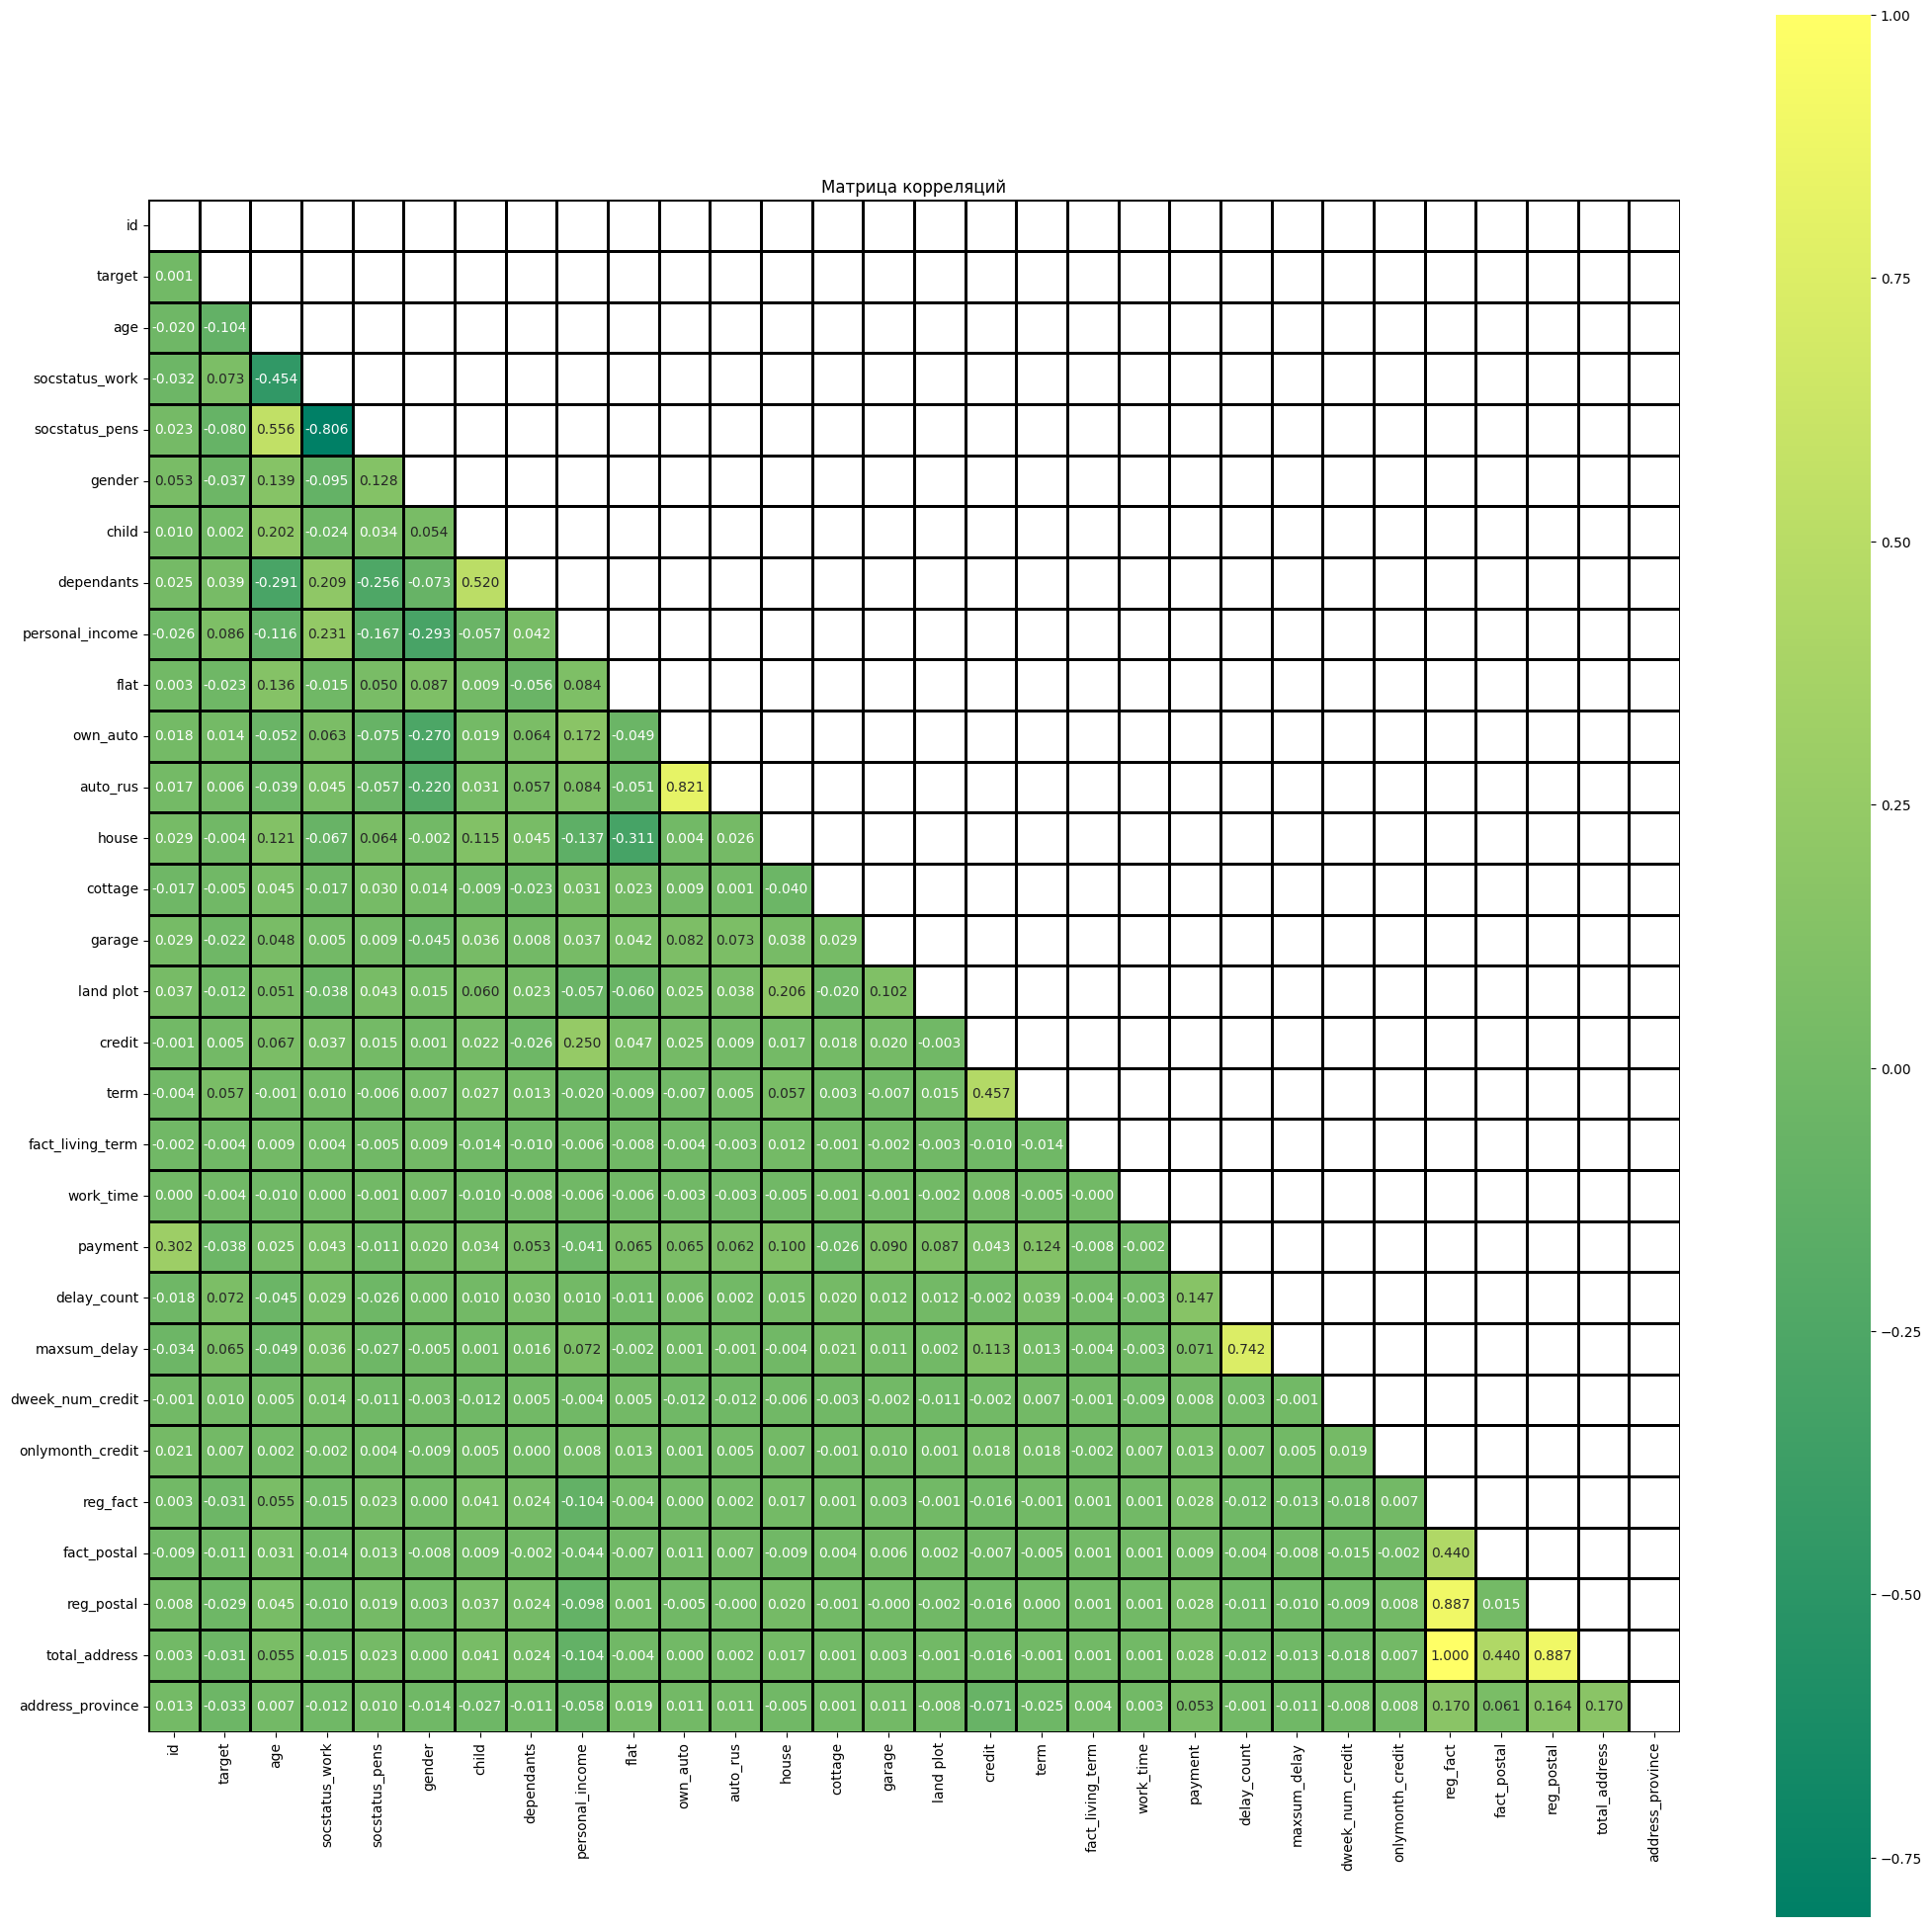

In [ ]:
fig, ax = plt.subplots(figsize=(25,25))
ax = sns.heatmap(data = df_clean.corr(numeric_only=True), annot=True, square=True,
                 cmap='summer', fmt='.3f', linewidths=1,
                 linecolor='black', mask=np.triu(df_clean.corr(numeric_only=True)))
plt.title('Матрица корреляций')
plt.show()

In [ ]:
# проанализировав таблицу корреляции исходя из целевого признака отберем следующие
#качественные и непрерывные признаки для дальнейшего их анализа и проверки гипотиз:
int_var =['age', 'personal_income', 'term', 'delay_count', 'maxsum_delay', 'dependants', 'payment']
cat_var = ['socstatus_pens', 'socstatus_work', 'gender', 'reg_fact', 'total_address', 'address_province']

In [ ]:
df_clean.groupby('target')[int_var].agg(['mean', 'median']).round(0)

age        personal_income          term        delay_count         \
        mean median            mean   median mean median        mean median   
target                                                                        
0       41.0   40.0         12598.0  11000.0  8.0    6.0         0.0    0.0   
1       37.0   35.0         14281.0  13000.0  8.0    8.0         0.0    0.0   

       maxsum_delay        dependants        payment         
               mean median       mean median    mean median  
target                                                       
0             200.0    0.0        1.0    0.0     8.0    5.0  
1             347.0    0.0        1.0    1.0     7.0    5.0

In [ ]:
dict_to_rus = {'age':'возраст',
               'dependants': 'Кол-во иждивенцев',
               'personal_income':'Личный доход',
               'term':'Срок кредита',
               'payment':'Кол-во платежей, которые сделал клиент',
               'delay_count':'Кол-во просрочек, допущенных клиентом',
               'maxsum_delay':'Максимальная сумма просрочки'
              }

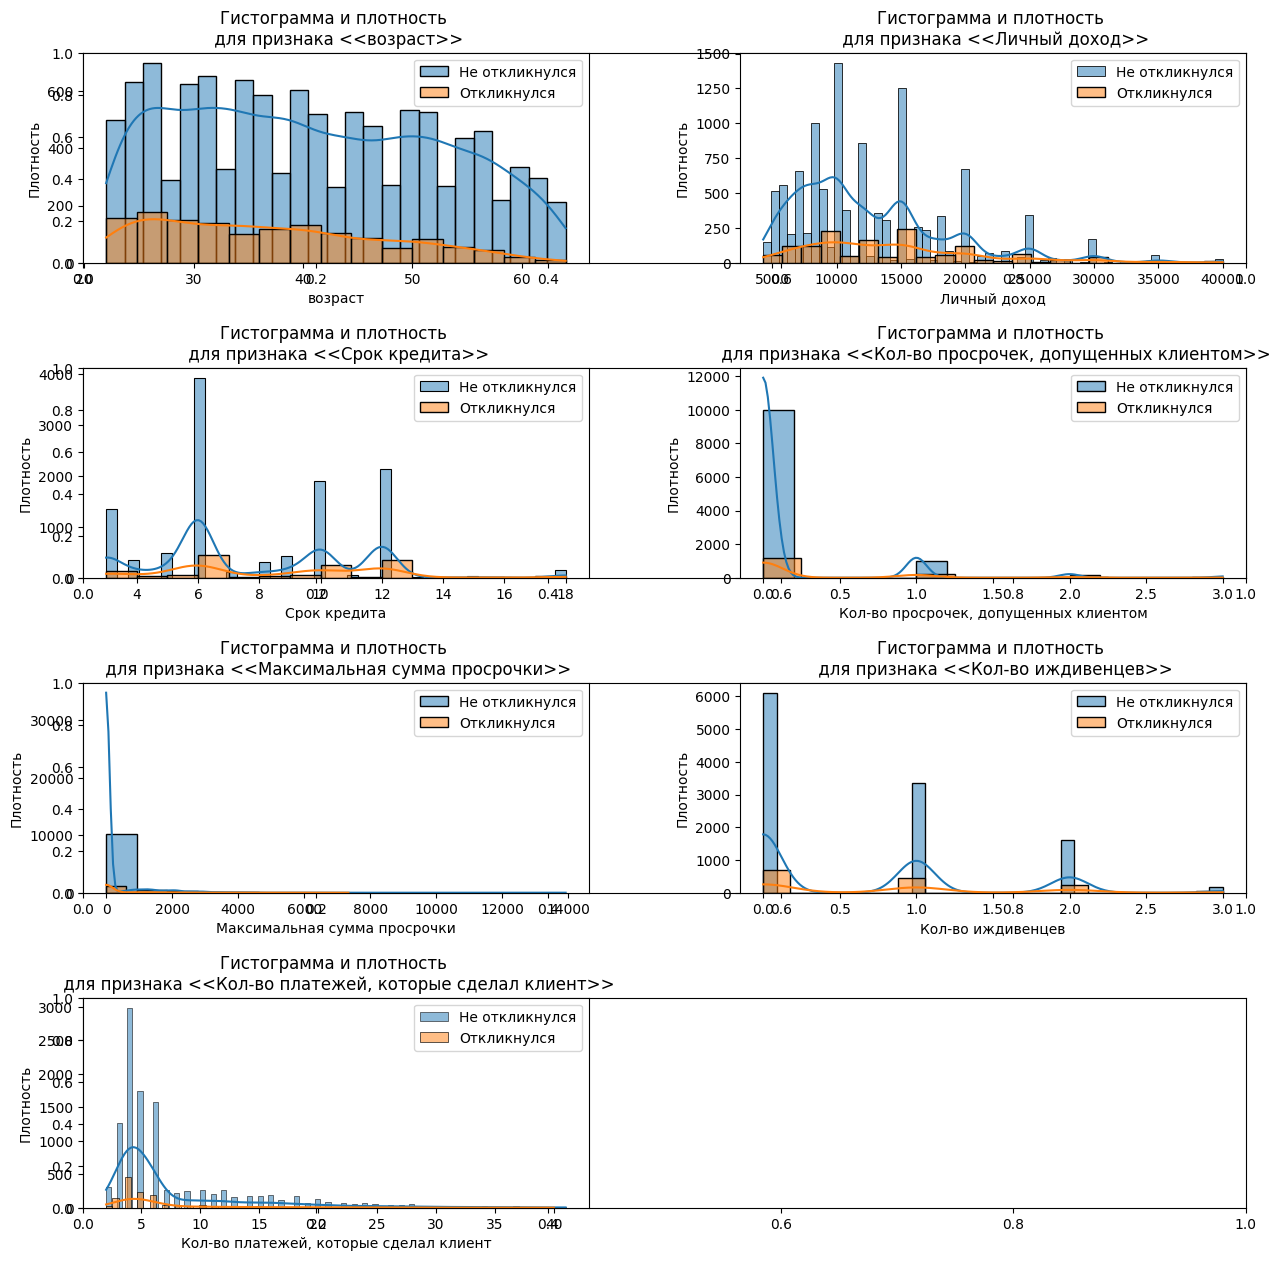

In [ ]:
fig, axes = plt.subplots(4, figsize=(15,15))
i=0
for i, col in enumerate(int_var):
    plt.subplot(4,2,i+1)
    ax = sns.histplot(df_clean[df_clean.target == 0][col], label = 'Не откликнулся', kde=True)
    ax = sns.histplot(df_clean[df_clean.target == 1][col], label = 'Откликнулся', kde=True)
    plt.title("Гистограмма и плотность \n для признака <<{}>>".format(dict_to_rus[col]))
    plt.xlabel(dict_to_rus[col])
    plt.ylabel('Плотность')
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    plt.legend()

________________________________________________________________________________
Проверка гипотез о подчинении нормальному закону распределения:

H_0: обе случайные величины подчиняются закону нормального распределения.

H_1: для исследуемых случайных величин закон нормального распредления не выполняется.

In [ ]:
for col in int_var:
    _, p_value = ks_2samp(df_clean[df_clean.target == 0][col].dropna(),
                                df_clean[df_clean.target == 1][col].dropna())
    if p_value <= 0.05:
        print(f"""p_value = {p_value}. Для признака <<{col}>> гипотеза о нормальности распределения ОТВЕРГАЕТСЯ.""")
    else:
        print(f'p_value = {p_value}. Для признака <<{col}>> гипотеза о нормальности распределения ПРИНИМАЕТСЯ.')


p_value = 1.4045006825814394e-23. Для признака <<age>> гипотеза о нормальности распределения ОТВЕРГАЕТСЯ.
p_value = 1.4981514928201024e-15. Для признака <<personal_income>> гипотеза о нормальности распределения ОТВЕРГАЕТСЯ.
p_value = 8.252774152709793e-07. Для признака <<term>> гипотеза о нормальности распределения ОТВЕРГАЕТСЯ.
p_value = 1.9318543753600638e-07. Для признака <<delay_count>> гипотеза о нормальности распределения ОТВЕРГАЕТСЯ.
p_value = 1.5542279332460613e-07. Для признака <<maxsum_delay>> гипотеза о нормальности распределения ОТВЕРГАЕТСЯ.
p_value = 0.0037203493355103447. Для признака <<dependants>> гипотеза о нормальности распределения ОТВЕРГАЕТСЯ.
p_value = 0.0006548613944296379. Для признака <<payment>> гипотеза о нормальности распределения ОТВЕРГАЕТСЯ.


Проверка гипотезы о равенстве признаков:

гипотеза Н_0: отсутствует статистически значимая разница между возрастом клиентов откликающихся и не откликающихся на маркетинговую компанию.

гипотеза H_1: возраст клиентов, откликающихся на маркетинговую компанию моложе возраста клиентов, не откликающихся на маркетинговую компанию.

In [ ]:
_, p_value = mannwhitneyu(df_clean[df_clean.target == 1].age.dropna(),
             df_clean[df_clean.target == 0].age.dropna(),
             alternative = 'less')
if p_value > 0.05:
    print(f'p_value = {p_value}.Для признака <<age>> принимается гипотеза H_0.')
else:
    print(f'p_value = {p_value}.Для признака <<age>> принимается гипотеза H_1.')

p_value = 1.0287189722224145e-30.Для признака <<age>> принимается гипотеза H_1.


In [ ]:
#Принимается гипотеза H_1: возраст клиентов откликающихся на маркетинговую компанию моложе возраста клиентов, не откликающихся на маркетинговую компанию.

Проверка гипотезы о равенстве признаков:

гипотеза Н_0: отсутствует статистически значимая разница между личным доходом клиентов откликающихся и не откликающихся на маркетинговую компанию.

гипотеза H_1: личный доход клиентов, откликающихся на маркетинговую компанию больше личного дохода клиентов, не откликающихся на маркетинговую компанию.

In [ ]:
_, p_value = mannwhitneyu(df_clean[df_clean.target == 1].personal_income.dropna(),
             df_clean[df_clean.target == 0].personal_income.dropna(),
             alternative = 'greater')
if p_value > 0.05:
    print(f'p_value = {p_value}.Для признака <<personal_income>> принимается гипотеза H_0.')
else:
    print(f'p_value = {p_value}.Для признака <<personal_income>> принимается гипотеза H_1.')

p_value = 1.454937512743383e-21.Для признака <<personal_income>> принимается гипотеза H_1.


In [ ]:
#Принимается гипотеза H_1: личный доход клиентов откликающихся на маркетинговую компанию больше личного дохода клиентов, не откликающихся на маркетинговую компанию.

Проверка гипотезы о равенстве признаков:

гипотеза Н_0: отсутствует статистически значимая разница между сроком кредита клиентов, откликающихся и не откликающихся на маркетинговую компанию.

гипотеза H_1: существует статистически значимая разница между сроком кредита клиентов, откликающихся на маркетинговую компанию  и сроком кредита клиентов, не откликающихся на маркетинговую компанию.

In [ ]:
_, p_value = mannwhitneyu(df_clean[df_clean.target == 1].term.dropna(),
             df_clean[df_clean.target == 0].term.dropna())
if p_value > 0.05:
    print(f'p_value = {p_value}.Для признака <<term>> принимается гипотеза H_0.')
else:
    print(f'p_value = {p_value}.Для признака <<term>> принимается гипотеза H_1.')

p_value = 9.936368806765995e-10.Для признака <<term>> принимается гипотеза H_1.


In [ ]:
 #Принимается гипотеза H_1: существует статистически значимая разница между сроком кредита клиентов,
 #откликающихся на маркетинговую компанию и клиентов, не откликающихся на маркетинговую компанию.

Проверка гипотезы о равенстве признаков:

гипотеза Н_0: отсутствует статистически значимая разница между кол-во просрочек, допущенных клиентами откликающимися и не откликающимися на маркетинговую компанию.

гипотеза H_1: существует статистически значимая разница между кол-вом просрочек, допущенных клиентами откликающимися на маркетинговую компанию и клиентами, не откликающимися на маркетинговую компанию.

In [ ]:
_, p_value = mannwhitneyu(df_clean[df_clean.target == 0].delay_count.dropna(),
             df_clean[df_clean.target == 1].delay_count.dropna())
if p_value > 0.05:
    print(f'p_value = {p_value}.Для признака <<delay_count>> принимается гипотеза H_0.')
else:
    print(f'p_value = {p_value}.Для признака <<delay_count>> принимается гипотеза H_1.')

p_value = 1.8326114336964285e-18.Для признака <<delay_count>> принимается гипотеза H_1.


In [ ]:
#Принимается гипотеза H_1: существует статистически значимая разница между кол-вом просрочек,
#допущенных клиентами откликающимися на маркетинговую компанию и клиентами, не откликающимися на маркетинговую компанию.

Проверка гипотезы о равенстве признаков:

гипотеза Н_0: отсутствует статистически значимая разница между максимальной суммой просрочки, допущенной клиентами откликающимися и не откликающимися на маркетинговую компанию.

гипотеза H_1: максимальная сумма просрочки, допущенная клиентами откликающимися на маркетинговую компанию больше максимальной суммы просрочки, допущенной клиентами, не откликающихся на маркетинговую компанию.

In [ ]:
_, p_value = mannwhitneyu(df_clean[df_clean.target == 1].maxsum_delay.dropna(),
             df_clean[df_clean.target == 0].maxsum_delay.dropna(),
             alternative = 'greater')
if p_value > 0.05:
    print(f'p_value = {p_value}.Для признака <<maxsum_delay>> принимается гипотеза H_0.')
else:
    print(f'p_value = {p_value}.Для признака <<maxsum_delay>> принимается гипотеза H_1.')

p_value = 1.9479471114075173e-18.Для признака <<maxsum_delay>> принимается гипотеза H_1.


In [ ]:
#Принимается гипотеза H_1: максимальная сумма просрочки, допущенная клиентами
#откликающимися на маркетинговую компанию больше максимальной суммы просрочки, допущенной клиентами, не откликающихся на маркетинговую компанию.

Проверка гипотезы о равенстве признаков:

гипотеза Н_0: отсутствует статистически значимая разница между признаком "кол-во иждивенцев у клиентов, откликающихся на маркетинговую компанию", и признаком "кол-во иждивенцев у клиентов, не откликающихся на маркетинговую компанию" равны.

гипотеза H_1: признак "кол-во иждивенцев у клиентов, откликающихся на маркетинговую компанию", больше, чем признак "кол-во иждивенцев у клиентов, не откликающихся на маркетинговую компанию".

In [ ]:
_, p_value = mannwhitneyu(df_clean[df_clean.target == 1].dependants.dropna(),
             df_clean[df_clean.target == 0].dependants.dropna(),
             alternative = 'greater')
if p_value > 0.05:
    print(f'p_value = {p_value}.Для признака <<dependants>> принимается гипотеза H_0.')
else:
    print(f'p_value = {p_value}.Для признака <<dependants>> принимается гипотеза H_1.')

p_value = 2.541891251763766e-05.Для признака <<dependants>> принимается гипотеза H_1.


In [ ]:
#Принимается гипотеза H_1: признак "кол-во иждивенцев у клиентов, откликающихся на маркетинговую компанию", больше,
#чем признак "кол-во иждивенцев у клиентов, не откликающихся на маркетинговую компанию".

Проверка гипотезы о равенстве признаков:

гипотеза Н_0: отсутствует статистически значимая разница между кол-вом платежей, которые сделал клиент откликающийся и не откликающийся на маркетинговую компанию.

гипотеза H_1: кол-во платежей, которые сделал клиент откликающихся на маркетинговую компанию меньше кол-ва платежей, которые сделал клиент, не откликающийся на маркетинговую компанию.

In [ ]:
_, p_value = mannwhitneyu(df_clean[df_clean.target == 1].payment.dropna(),
             df_clean[df_clean.target == 0].payment.dropna(),
             alternative = 'less')
if p_value > 0.05:
    print(f'p_value = {p_value}.Для признака <<payment>> принимается гипотеза H_0.')
else:
    print(f'p_value = {p_value}.Для признака <<payment>> принимается гипотеза H_1.')

p_value = 0.001233339968632585.Для признака <<payment>> принимается гипотеза H_1.


In [ ]:
#Принимается гипотеза H_1: кол-во платежей, которые сделал клиент откликающихся на маркетинговую компанию
#меньше кол-ва платежей, которые сделал клиент, не откликающийся на маркетинговую компанию.

In [ ]:
dict_dist_cat = {'socstatus_work':'работает(1)/не работает(0)',
                 'socstatus_pens':'пенсионер(1)/не пенсионер(0)',
                 'gender': 'пол',
                 'reg_fact':'адрес фактического пребывания клиента \n и его почтовый адрес совпадают',
                 'total_address':'почтовый, фактический и адрес регистрации совпадают',
                 'address_province':'область регистрации, фактического пребывания, \n почтового адреса и область расположения торговой точки,\n где клиент брал кредит совпадают'
                 }

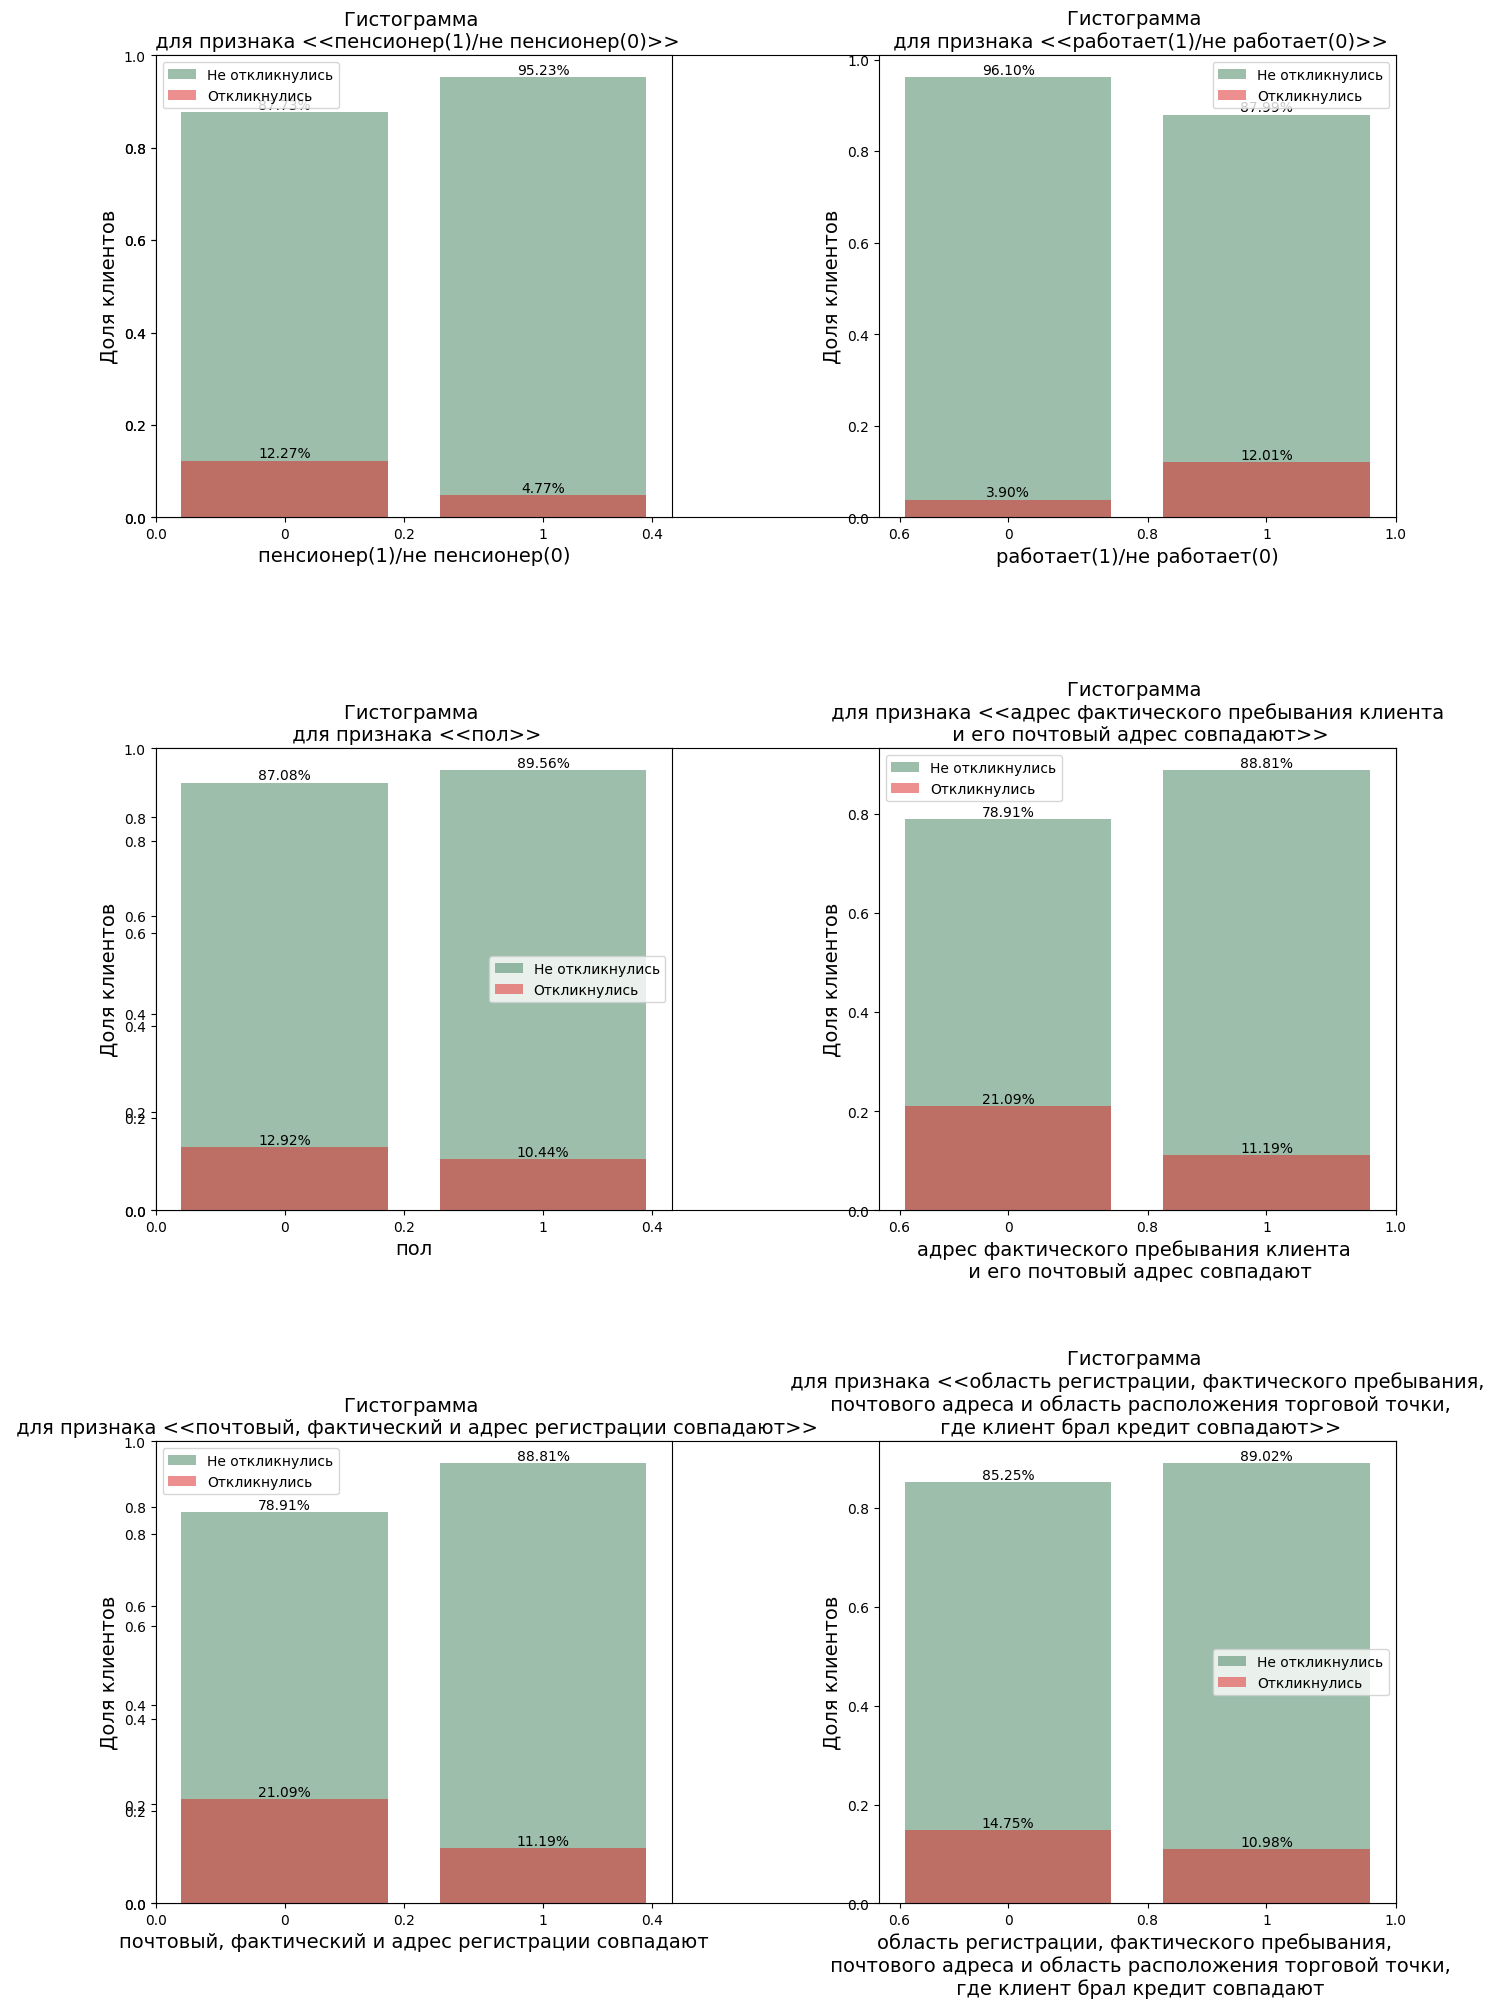

In [ ]:
fig, axes = plt.subplots(3, figsize=(16,24))
i=0
for i, col in enumerate(cat_var):
    plt.subplot(3,2,i+1)
    data_all = df_clean[col].value_counts()
    r = (pd.DataFrame([df_clean[df_clean.target == 0][col].value_counts()/data_all,
              df_clean[df_clean.target == 1][col].value_counts()/data_all]).T)
    r.columns = ['0','1']
    ax1 = sns.barplot(x = r.index, y = r['0'], data = r, color='seagreen',
                      alpha = 0.5, label = 'Не откликнулись')
    ax2 = sns.barplot(x = r.index, y = r['1'], data = r, color='red',
                      alpha = 0.5, label = 'Откликнулись')
    plt.title("Гистограмма \n для признака <<{}>>".format(dict_dist_cat[col]), fontsize = 14)
    plt.xlabel(dict_dist_cat[col], fontsize = 14)
    plt.ylabel('Доля клиентов', fontsize = 14)
    plt.subplots_adjust(wspace=0.4, hspace=0.5)
    plt.legend()
    for p in ax1.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax1.annotate('{:.2f}%'.format(100*y),
            (x.mean(), y),ha='center', va='bottom', fontsize = 10)

In [ ]:
def test_z_criterion(col, goal, alpha):
    import scipy.stats as st
    import math
    gen_group_shape = df_clean[col].value_counts()
    goal_group_shape = df_clean.groupby(col)[goal].sum()
    p = goal_group_shape / gen_group_shape
    p_combined = goal_group_shape.sum() / gen_group_shape.sum()
    difference = p.iloc[0] - p.iloc[1]
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/gen_group_shape.iloc[0] + 1/gen_group_shape.iloc[1]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях
по признаку <<{col}>> статистически значима.""")
    else: print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях по
признаку <<{col}>> статистически незначима.""")
    print('------------------------------------------------------------')

Проверяю гипотезу:

1

H_0: нет статистически значимой разницы между долями клиентов - категории работающие и категории не работающие

H_1: имеется статистически значимая разница между долями клиентов - категории работающие и категории не работающие

2

H_0: нет статистически значимой разницы между долями клиентов - пенсионеров и не пенсионеров

H_1: имеется статистически значимая разница между долями клиентов - категории пенсионеры и категории не пенсионеров

3

H_0: нет статистически значимой разницы между долями клиентов - женщин и мужчин

H_1: имеется статистически значимая разница между долями клиентов - женщин и мужчин

4

H_0: нет статистически значимой разницы между долями клиентов, у которых адрес фактического пребывания совпадает с его почтовым адресом и клиентов, для которых эти адреса не совпадают

H_1: имеется статистически значимая разница между долями клиентов, у которых адрес фактического пребывания совпадает с его почтовым адресом и клиентов, для которых эти адреса не совпадаю

5

H_0: нет статистически значимой разницы между долями клиентов, у которых совпадают почтовый, фактический и адрес регистрации и клиентов, для которых эти адреса не совпадают

H_1: имеется статистически значимая разница между долями клиентов, у которых совпадают почтовый, фактический и адрес регистрации и клиентов, для которых эти адреса не совпадают

6

H_0: нет статистически значимой разницы между долями клиентов, у которых совпадают обл. рег-ции, факт. пребывания,  почтового адреса и обл. расположения торговой точки, где клиент брал кредит и клиентов, для которых эти адреса не совпадают

H_1: имеется статистически значимая разница между долями клиентов, у которых совпадают обл. рег-ции, факт. пребывания,  почтового адреса и обл. расположения торговой точки, где клиент брал кредит и клиентов, для которых эти адреса не совпадают

In [ ]:
for col in cat_var:
    test_z_criterion(col, 'target', 0.05)

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<socstatus_pens>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<socstatus_work>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<gender>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<reg_fact>> статистически значима.
------------------------------------------------------------
Результаты

In [ ]:
# по итогам проверки гипотез и анализа матрицы корреляций, получили приведенный ниже портрет клиента.

Портрет клиента, откликающегося на маркетинговую компанию:


1.   Возраст - 35-37 лет (чем моложе, тем больше отклик);
2.   Кол-во иждивенцев - 0 человек (чем больше иждивенцев, тем больше отклик);
3.   Личный доход - 13000 - 14281 рублей (чем больше доход, тем больше отклик);
4.   Срок кредита - 8 месяцев (чем больше срок кредита, тем больше отклик);
5.   Кол-во платежей, которые сделал клиент - 5-7 платежей (чем меньше платежей, тем больше отклик);
6.   Кол-во просрочек, допущенных клиентом - 0 единиц (чем больше просрочек, тем больше отклик);
7.   Максимальная сумма просрочки - 347 рублей (чем больше сумма просрочки, тем больше отклик);  
8.   Социальный статус - не пенсионер и работает;
9.   Пол - значение: 0;
10.  Адреса фактического пребывания и почтового адреса клиента  - не совпадают;
11.  Почтовый, фактический и адрес регистрации - не совпадают;
12.  Область регистрации, фактического пребывания, почтового адреса и область расположения торговой точки, где клиент брал кредит - не совпадают;

